In [34]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
import scipy.optimize as sc
import glob
from matplotlib.ticker import MultipleLocator
import subprocess
from scipy.optimize import curve_fit
from scipy.stats import chi2


In [35]:
setup_path ="/home/haue/repositories/Masters/setup/" 
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/inclbetacut/"
twop_path = "/home/haue/repositories/Masters/data/twoproton/Al/"
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
twop_files = glob.glob(os.path.join(twop_path, "*mlio.root"))
frac = 0.9542011788469517 # (Na21/(p+Na21)) amount of energy the daughter nucleus gets of the total energy released in the decay
frac_err = 1.032071836027589e-10 # uncertainty of the fraction
mp  = 1007825.031898
mNa = 20997654.459
mNe = 19992440.17525
S1p = 5504.1000
S2p = 7935.9963
QB  = 17600
ma = 4026430
mne18 = 18005708.7

def y1(x, E1):
    return E1 + 0*x
def y2(x, E1, E2): # E1 may be fixed
    M = mp/mNa
    return E2 - 2*M*np.sqrt(E1*E2)*x + E1*M**2

def q2p(E1, Q2):
    massfrac = (mNa+mp)/mNa
    return massfrac * E1 +Q2
plt.rcParams["xtick.top"] = True    # enable top x-ticks
plt.rcParams["ytick.right"] = True  # enable right y-ticks
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"


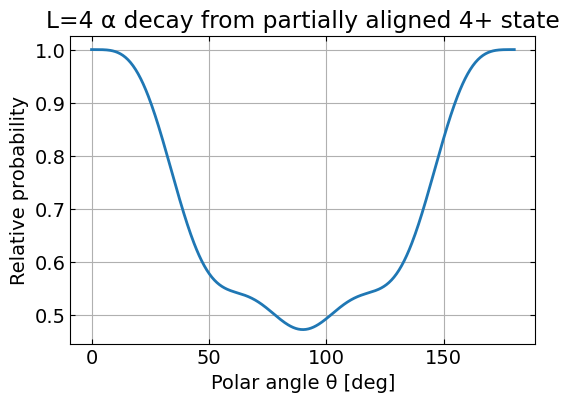

In [36]:
(mne18+ma)/mne18*4.7
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Polar angle array (0 to 180 degrees)
theta = np.linspace(0, np.pi, 500)

L = 4
m_vals = np.arange(-4, 5)  # all m=-4..4

# Example alignment: central m-states favored
# symmetric around m=0
rho_mm = np.array([0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05, 0.05, 0.05])
rho_mm /= rho_mm.sum()  # normalize

W = np.zeros_like(theta)
for m, rho in zip(m_vals, rho_mm):
    Y = sph_harm(m, L, 0, theta)  # phi=0, polar distribution only
    W += rho * np.abs(Y)**2

# normalize to max=1 for plotting
W /= W.max()

# convert to degrees
theta_deg = np.degrees(theta)

plt.figure(figsize=(6,4))
plt.plot(theta_deg, W, lw=2)
plt.xlabel('Polar angle θ [deg]')
plt.ylabel('Relative probability')
plt.title('L=4 α decay from partially aligned 4+ state')
plt.grid(True)
plt.show()


In [37]:
EE2p = np.array([])
E1 = np.array([])
E2 = np.array([])
Q2p = np.array([])
theta = np.array([])
for batch in uproot.iterate(twop_files, expressions=["E", "E1", "E2", "Q2p", "Theta"],
                            cut="Q2p>0"):
    EE2p=np.append(EE2p, ak.flatten(batch.E))
    E1=np.append(E1, batch.E1)
    E2=np.append(E2, batch.E2)
    Q2p=np.append(Q2p, batch.Q2p)
    theta=np.append(theta, batch.Theta)
import re

E_excited = []
E_excited_err = []

pattern = re.compile(r"21NA\s+L\s+([\d.]+)\s+([\d.]+)")

with open("Na21_ensdf.txt", "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            E_excited.append(float(match.group(1)))
            E_excited_err.append(float(match.group(2)))

E_excited = np.array(E_excited)
E_excited_err = np.array(E_excited_err)

Erik_Es = np.array([3.52,3.86,4.29,4.46,5.02,5.15,5.37,5.95,6.20,6.47,7.49,8.13,8.31,8.42,8.55,8.8,8.97,9.0,9.8,10.2,10.7])*1e3
Erik_Es_err = np.array([2,1,2,2,1,2,1,2,1,2,2,2,2,2,0,0,1,0,1,0,2])

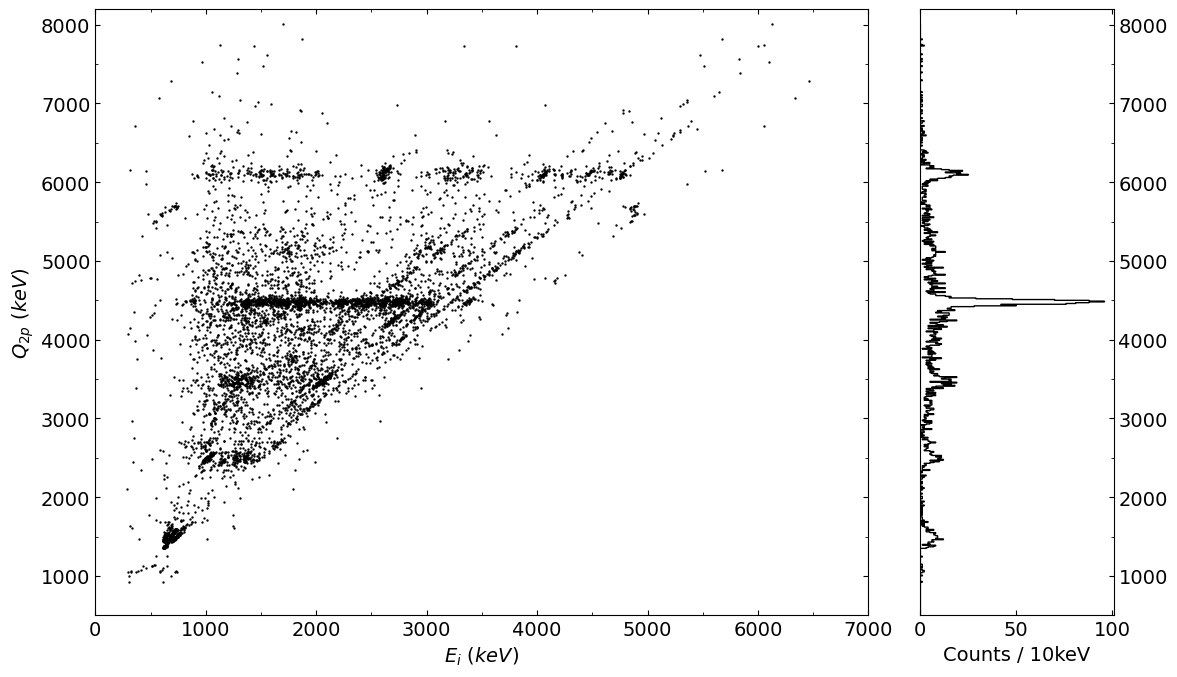

In [38]:
plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})
ax1.scatter(E1,Q2p, color='k', s=0.5)
ax1.scatter(E2,Q2p, color='k', s=0.5)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7000)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(500,8200)

ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
#visualization of fitting function
#es = np.linspace(1000,4000)
#ax1.plot(es,q2p(es,900), ls='--', color='r')


fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig("fynbo.pdf")

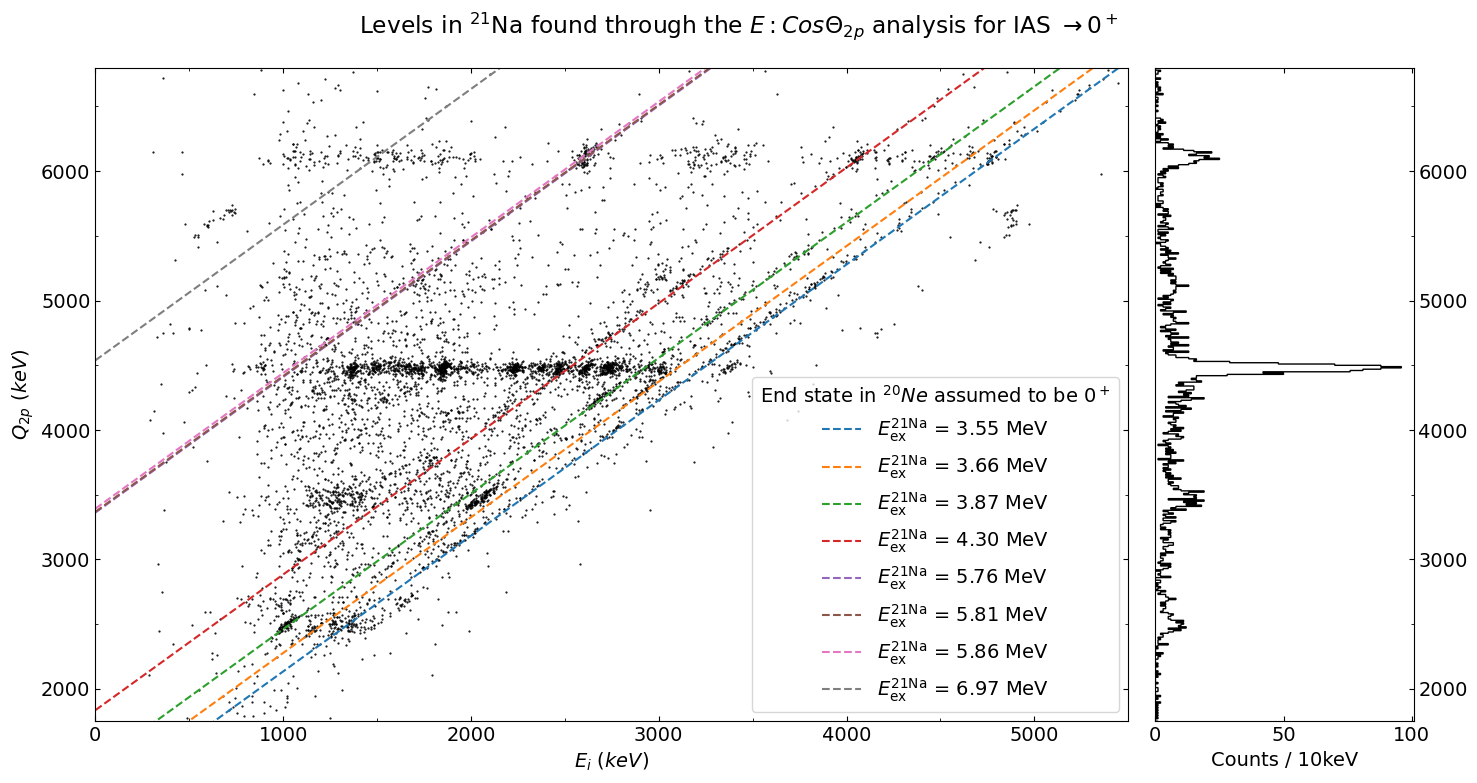

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True,gridspec_kw={'width_ratios':[4,1]})
ax1.scatter(E1,Q2p, color='k', s=0.3)
ax1.scatter(E2,Q2p, color='k', s=0.3)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,5500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(1750,6800)

ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
ex0 = np.array([5811., 4297., 3550., 5762., 6975., 5858. ,3870.,3662.])
E2s0 = np.array([3207., 1748., 1035. ,3201. ,4321. ,3230., 1346. ,1171.])

sort_idx = np.argsort(ex0)
ex0_sorted  = ex0[sort_idx]
E2s0_sorted = E2s0[sort_idx]
Q2p_0 = np.array(E2s0_sorted)*(mNe + mp)/mNe

es = np.linspace(0,8000,10000)
for q,e in zip(Q2p_0,ex0_sorted):
    ax1.plot(es, q2p(es,q), ls='--',label = rf"$E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}}$ = {e/1e3:.2f} MeV")

ax1.legend(title=r"End state in $^{20}Ne$ assumed to be $0^+$", loc='lower right')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle(r"Levels in $^{21}\mathrm{Na}$ found through the $E:Cos\Theta_{2p}$ analysis for IAS $\rightarrow 0^+$")
plt.tight_layout()


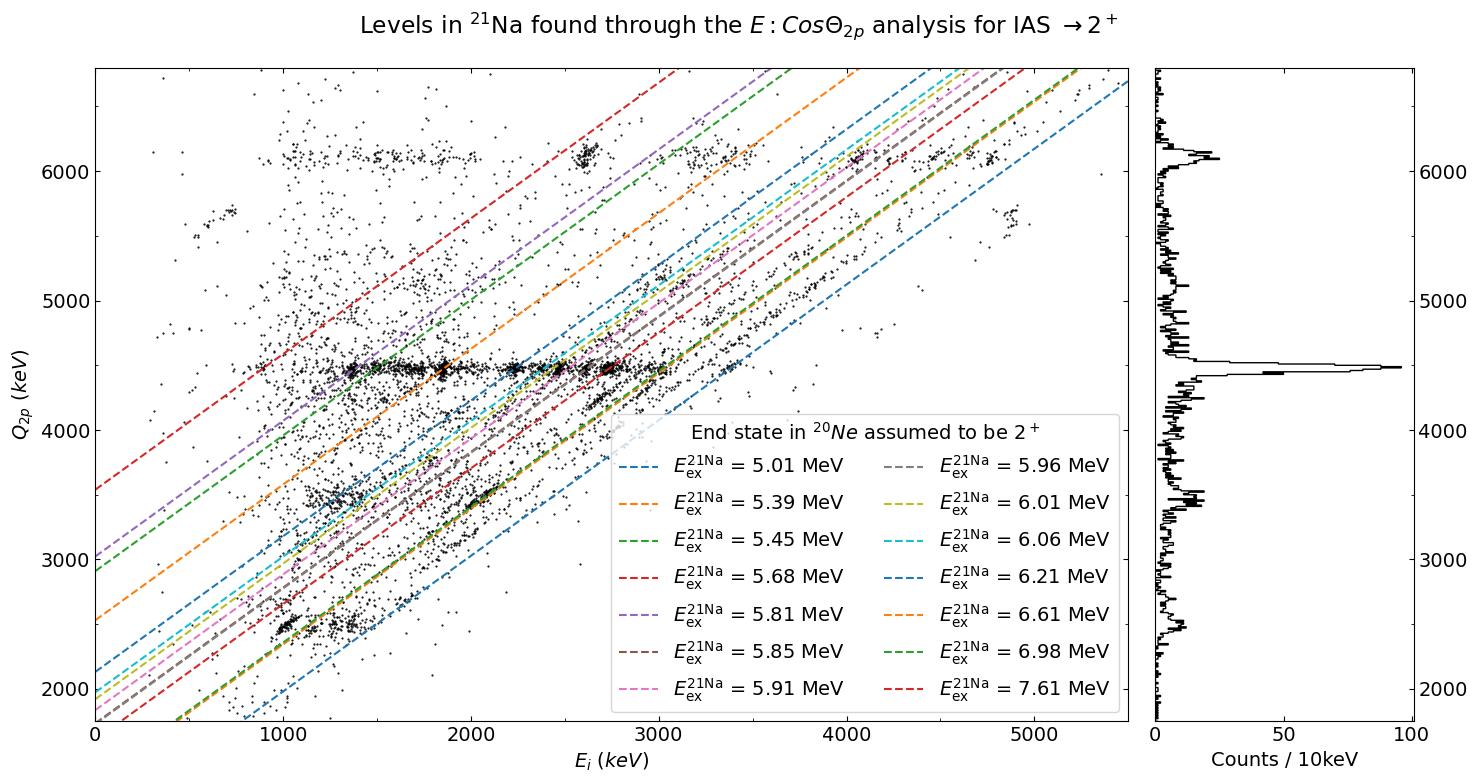

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True,gridspec_kw={'width_ratios':[4,1]})
ax1.scatter(E1,Q2p, color='k', s=0.3)
ax1.scatter(E2,Q2p, color='k', s=0.3)
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,5500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(1750,6800)

ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

#lims = (6000,6230) lims = (4350,4580)
E2s2 = np.array([2410., 1531., 2030.,2879., 1646., 1234., 2771., 1880.,3370.,1749. ,1248., 1829. ,1652., 888.])
ex2 = np.array([6606. ,5683. ,6212. ,5809., 5957., 5388., 6978., 6060., 7608., 5907., 5445., 6007. ,5851. ,5011.])



sort_idx = np.argsort(ex2)
ex2_sorted  = ex2[sort_idx]
E2s2_sorted = E2s2[sort_idx]
Q2p_2 = np.array(E2s2_sorted)*(mNe + mp)/mNe

es = np.linspace(0,8000,10000)
for q,e in zip(Q2p_2,ex2_sorted):
    ax1.plot(es, q2p(es,q), ls='--', label = rf"$E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}}$ = {e/1e3:.2f} MeV")
ax1.legend(title=r"End state in $^{20}Ne$ assumed to be $2^+$", loc='lower right', ncol=2)
fig.suptitle(r"Levels in $^{21}\mathrm{Na}$ found through the $E:Cos\Theta_{2p}$ analysis for IAS $\rightarrow 2^+$")
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
plt.tight_layout()

Candidate Q2=1105.0 (counts=100), Fit Q2=1106.3 ± 1.1, Ex=3538.2 -> known value found: 3520.0 keV
Candidate Q2=1235.0 (counts=30), Fit Q2=1238.1 ± 2.1, Ex=3670.0 -> known value found: 3678.9 keV
Candidate Q2=1420.0 (counts=80), Fit Q2=1423.4 ± 1.2, Ex=3855.3 -> known value found: 3860.0 keV
Candidate Q2=1860.0 (counts=104), Fit Q2=1860.3 ± 1.1, Ex=4292.2 -> known value found: 4290.0 keV
Candidate Q2=2015.0 (counts=27), Fit Q2=2015.5 ± 2.5, Ex=4447.4 -> known value found: 4460.0 keV
Candidate Q2=2560.0 (counts=29), Fit Q2=2563.9 ± 2.1, Ex=4995.8 -> known value found: 5020.0 keV
Candidate Q2=2745.0 (counts=25), Fit Q2=2746.1 ± 2.2, Ex=5178.0 -> known value found: 5150.0 keV
Candidate Q2=3400.0 (counts=62), Fit Q2=3402.6 ± 1.6, Ex=5834.5 -> known value found: 5828.0 keV
Candidate Q2=4950.0 (counts=26), Fit Q2=4947.5 ± 2.1, Ex=7379.4 -> no known value found...


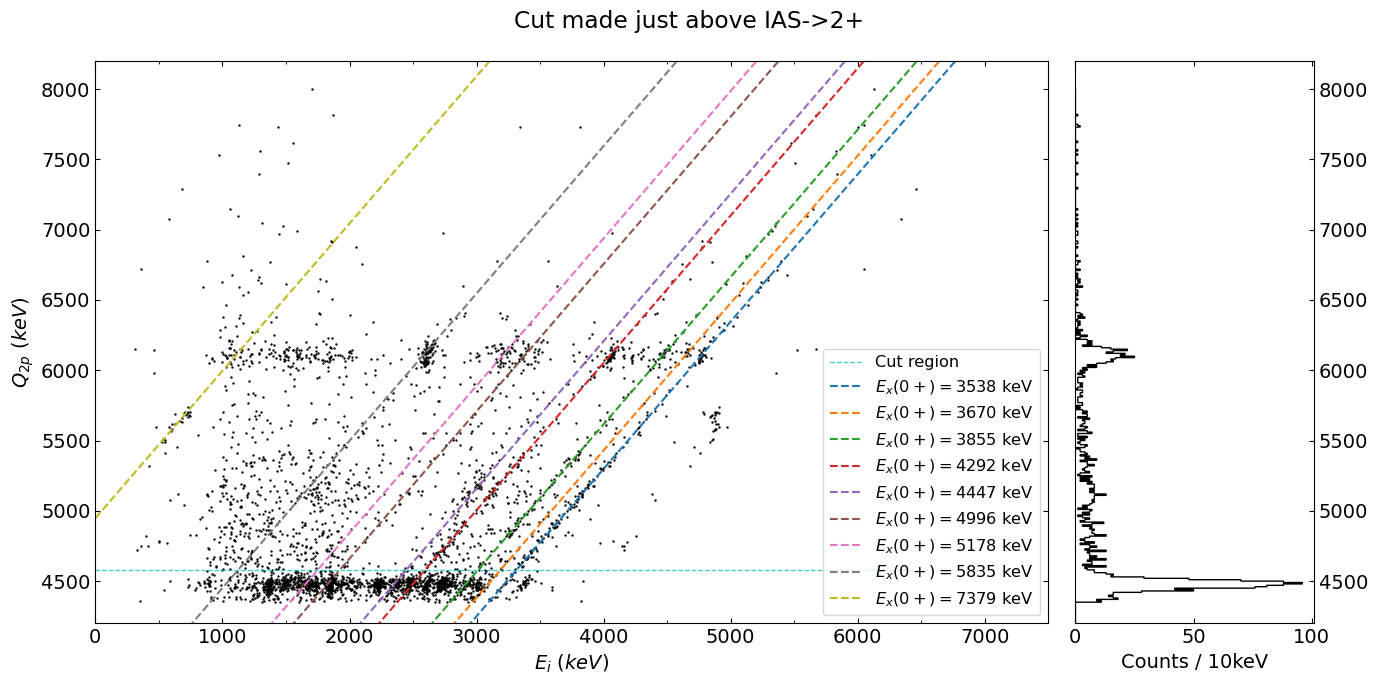

In [8]:
from scipy.optimize import curve_fit

# --------------------------
# Candidate search parameters
# --------------------------
Nmin = 25     # minimum events close to line
dE   = 20     # tolerance in keV
step = 5      # step size for Q2 scan
Q2_candidates = np.arange(0, 5500, step)
mask = (Q2p>4580)
mask_ias = (Q2p>4350)
# --------------------------
# Search for candidates
# --------------------------
results = []
for Q2_guess in Q2_candidates:
    diff1 = np.abs(Q2p[mask] - q2p(E1[mask], Q2_guess))
    diff2 = np.abs(Q2p[mask] - q2p(E2[mask], Q2_guess))
    mask_line = (diff1 < dE) | (diff2<dE)
    count = np.sum(mask_line)
    if count >= Nmin:
        results.append((Q2_guess, count))

results.sort(key=lambda x: x[0])

# --------------------------
# Group nearby candidates, keep best in each group
# --------------------------
final_candidates = []
if results:
    group = [results[0]]
    for q2, c in results[1:]:
        if abs(q2 - group[-1][0]) <= dE:
            group.append((q2, c))
        else:
            final_candidates.append(max(group, key=lambda x: x[1]))
            group = [(q2, c)]
    final_candidates.append(max(group, key=lambda x: x[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})

ax1.scatter(E1[mask_ias],Q2p[mask_ias], color='k', s=0.5)
ax1.scatter(E2[mask_ias],Q2p[mask_ias], color='k', s=0.5)
ax1.hlines(4580, 0, 7000, color='c', ls='--', lw=0.9, alpha=0.8, label="Cut region")
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(4200,8200)

ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

e1 = E1[mask]
e2 = E2[mask]
q2 = Q2p[mask]

E_fit = np.linspace(0, 7000, 500)
for Q2_guess, count in final_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE

    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, np.array(E_vals), np.array(Q2p_vals), p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]
        Ex = Q2_fit + S2p - S1p

        # --- New addition: check against known values ---
        known_match = None

        # Check Erik_Es
        diffs_erik = np.abs(Erik_Es - Ex)
        if np.any(diffs_erik <= 30):
            idx = np.argmin(diffs_erik)
            known_match = Erik_Es[idx]

        # Check ENSDF values only if no Erik match
        if known_match is None:
            diffs_exc = np.abs(E_excited - Ex)
            if np.any(diffs_exc <= 30):
                idx = np.argmin(diffs_exc)
                known_match = E_excited[idx]

        if known_match is not None:
            match_msg = f"known value found: {known_match:.1f} keV"
        else:
            match_msg = "no known value found..."

        print(f"Candidate Q2={Q2_guess:.1f} (counts={count}), "
              f"Fit Q2={Q2_fit:.1f} ± {Q2_err:.1f}, "
              f"Ex={Ex:.1f} -> {match_msg}")
        #if 9018<Ex<9020:
        ax1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', label=fr"$E_x(0+)={Ex:.0f}$ keV")# || $E_x(2+)={Ex+1634:.0f}$ keV")



ax1.legend(loc='lower right', ncol=1, fontsize='small')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle(f"Cut made just above IAS->2+")
plt.tight_layout()


Candidate Q2=1105.0 (counts=100), Fit Q2=1106.3 ± 1.1, Ex=3538.2 -> known value found: 3520.0 keV
Candidate Q2=1235.0 (counts=30), Fit Q2=1238.1 ± 2.1, Ex=3670.0 -> known value found: 3678.9 keV
Candidate Q2=1420.0 (counts=80), Fit Q2=1423.4 ± 1.2, Ex=3855.3 -> known value found: 3860.0 keV
Candidate Q2=1860.0 (counts=104), Fit Q2=1860.3 ± 1.1, Ex=4292.2 -> known value found: 4290.0 keV
Candidate Q2=2015.0 (counts=27), Fit Q2=2015.5 ± 2.5, Ex=4447.4 -> known value found: 4460.0 keV
Candidate Q2=2560.0 (counts=29), Fit Q2=2563.9 ± 2.1, Ex=4995.8 -> known value found: 5020.0 keV
Candidate Q2=2745.0 (counts=25), Fit Q2=2746.1 ± 2.2, Ex=5178.0 -> known value found: 5150.0 keV
Candidate Q2=3400.0 (counts=62), Fit Q2=3402.6 ± 1.6, Ex=5834.5 -> known value found: 5828.0 keV
Candidate Q2=4950.0 (counts=26), Fit Q2=4947.5 ± 2.1, Ex=7379.4 -> no known value found...


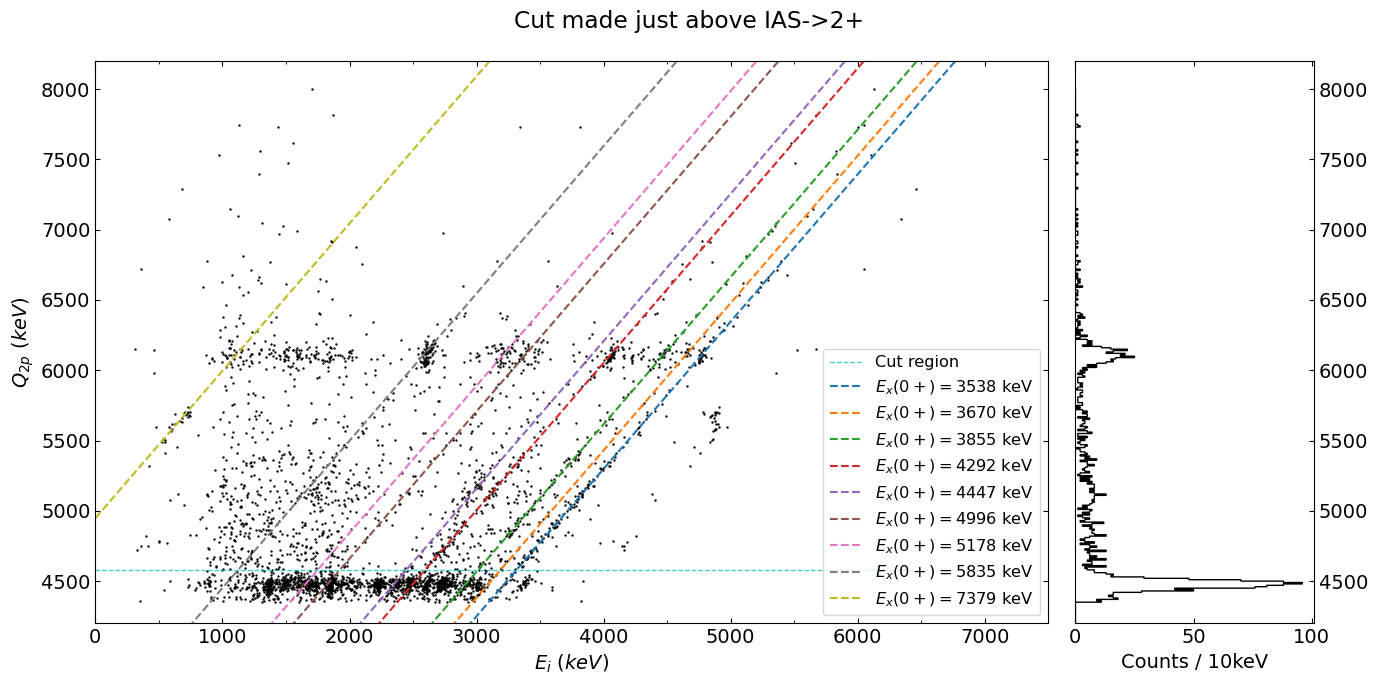

In [9]:
from scipy.optimize import curve_fit

# --------------------------
# Candidate search parameters
# --------------------------
Nmin = 25     # minimum events close to line
dE   = 20     # tolerance in keV
step = 5      # step size for Q2 scan
Q2_candidates = np.arange(0, 5500, step)
mask = (Q2p>4580)
mask_ias = (Q2p>4350)
# --------------------------
# Search for candidates
# --------------------------
results = []
for Q2_guess in Q2_candidates:
    diff1 = np.abs(Q2p[mask] - q2p(E1[mask], Q2_guess))
    diff2 = np.abs(Q2p[mask] - q2p(E2[mask], Q2_guess))
    mask_line = (diff1 < dE) | (diff2<dE)
    count = np.sum(mask_line)
    if count >= Nmin:
        results.append((Q2_guess, count))

results.sort(key=lambda x: x[0])

# --------------------------
# Group nearby candidates, keep best in each group
# --------------------------
final_candidates = []
if results:
    group = [results[0]]
    for q2, c in results[1:]:
        if abs(q2 - group[-1][0]) <= dE:
            group.append((q2, c))
        else:
            final_candidates.append(max(group, key=lambda x: x[1]))
            group = [(q2, c)]
    final_candidates.append(max(group, key=lambda x: x[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,gridspec_kw={'width_ratios':[4,1]})

ax1.scatter(E1[mask_ias],Q2p[mask_ias], color='k', s=0.5)
ax1.scatter(E2[mask_ias],Q2p[mask_ias], color='k', s=0.5)
ax1.hlines(4580, 0, 7000, color='c', ls='--', lw=0.9, alpha=0.8, label="Cut region")
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(4200,8200)

ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10), histtype='step',orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

e1 = E1[mask]
e2 = E2[mask]
q2 = Q2p[mask]

E_fit = np.linspace(0, 7000, 500)
for Q2_guess, count in final_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE

    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, np.array(E_vals), np.array(Q2p_vals), p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]
        Ex = Q2_fit + S2p - S1p

        # --- New addition: check against known values ---
        known_match = None

        # Check Erik_Es
        diffs_erik = np.abs(Erik_Es - Ex)
        if np.any(diffs_erik <= 30):
            idx = np.argmin(diffs_erik)
            known_match = Erik_Es[idx]

        # Check ENSDF values only if no Erik match
        if known_match is None:
            diffs_exc = np.abs(E_excited - Ex)
            if np.any(diffs_exc <= 30):
                idx = np.argmin(diffs_exc)
                known_match = E_excited[idx]

        if known_match is not None:
            match_msg = f"known value found: {known_match:.1f} keV"
        else:
            match_msg = "no known value found..."

        print(f"Candidate Q2={Q2_guess:.1f} (counts={count}), "
              f"Fit Q2={Q2_fit:.1f} ± {Q2_err:.1f}, "
              f"Ex={Ex:.1f} -> {match_msg}")
        #if 9018<Ex<9020:
        ax1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', label=fr"$E_x(0+)={Ex:.0f}$ keV")# || $E_x(2+)={Ex+1634:.0f}$ keV")



ax1.legend(loc='lower right', ncol=1, fontsize='small')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle(f"Cut made just above IAS->2+")
plt.tight_layout()


Candidate Q2=950.0 (counts=72), Fit Q2=950.5 ± 1.2
  Ex(0+)= 3382.4 -> no known value found...
  Ex(2+)= 5016.4 -> known value found: 5020.0 keV
Candidate Q2=1110.0 (counts=150), Fit Q2=1109.4 ± 0.8
  Ex(0+)= 3541.3 -> known value found: 3520.0 keV
  Ex(2+)= 5175.3 -> known value found: 5150.0 keV
Candidate Q2=1250.0 (counts=106), Fit Q2=1249.7 ± 1.0
  Ex(0+)= 3681.6 -> known value found: 3678.9 keV
  Ex(2+)= 5315.6 -> no known value found...
Candidate Q2=1320.0 (counts=178), Fit Q2=1320.7 ± 0.8
  Ex(0+)= 3752.6 -> no known value found...
  Ex(2+)= 5386.6 -> known value found: 5370.0 keV
Candidate Q2=1430.0 (counts=200), Fit Q2=1429.2 ± 0.7
  Ex(0+)= 3861.1 -> known value found: 3860.0 keV
  Ex(2+)= 5495.1 -> no known value found...
Candidate Q2=1620.0 (counts=145), Fit Q2=1620.0 ± 0.9
  Ex(0+)= 4051.9 -> no known value found...
  Ex(2+)= 5685.9 -> no known value found...
Candidate Q2=1740.0 (counts=116), Fit Q2=1740.7 ± 1.0
  Ex(0+)= 4172.6 -> known value found: 4169.6 keV
  Ex(2+)= 5

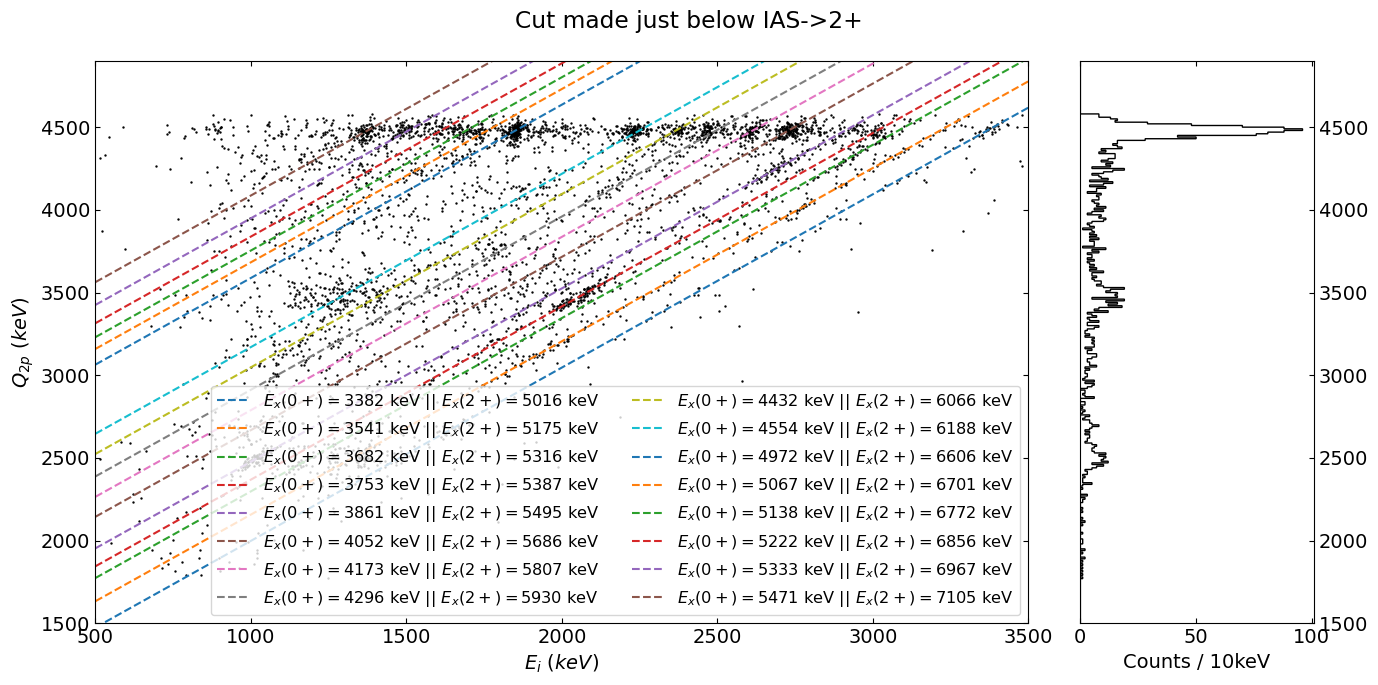

In [10]:
Nmin = 50        # minimum events close to line
dE   = 20        # tolerance in keV for matching points to line
step = 10         # step size for Q2 scan
delta_count = 5  # minimal count difference to flag local max
Q2_candidates = np.arange(0, 10000, step)
mask_ias = (Q2p < 4580) & (Q2p > 1750)
mask = (Q2p < 4580) & (Q2p > 1750)

# --------------------------
# Arrays for plotting/fitting
# --------------------------
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
q2 = np.array(Q2p[mask])
E_fit = np.linspace(0, 7000, 500)
# --------------------------
# Count points near each Q2 candidate
# --------------------------
counts_vs_Q2 = []
for Q2_guess in Q2_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE
    mask_line = mask_line1 | mask_line2
    count = np.sum(mask_line)
    #if count >= Nmin:
    counts_vs_Q2.append((Q2_guess, count))
#print(counts_vs_Q2)
# --------------------------
# Detect local significant maxima
# --------------------------
# --------------------------
# Detect local significant maxima with cascading neighbor check
# --------------------------
final_candidates = []
if counts_vs_Q2:
    counts = counts_vs_Q2  # already sorted by Q2
    n = len(counts)

    for i in range(n):
        count_curr = counts[i][1]
        if count_curr>=Nmin:
        # Try neighbor windows from 2 to 5
            for window in range(2, 6):
                # Previous 'window' counts
                prev_counts = [counts[i - w][1] if i - w >= 0 else -np.inf for w in range(1, window+1)]

                # Next 'window' counts
                next_counts = [counts[i + w][1] if i + w < n else -np.inf for w in range(1, window+1)]

                
                # Check if all neighbors are <= current
                if all(c <= count_curr+2 for c in prev_counts) and all(c <= count_curr+2 for c in next_counts):
                    final_candidates.append(counts[i])
                    break  # Stop checking larger windows once one is satisfied

#print("Final candidates (Q2, count):", final_candidates)
grouped_candidates = []
if final_candidates:
    final_candidates.sort(key=lambda x: x[0])  # sort by Q2
    group = [final_candidates[0]]
    for q, c in final_candidates[1:]:
        if abs(q - group[-1][0]) <= 30:  # within 30 keV
            group.append((q, c))
        else:
            # take the mean Q2 of the group
            mean_q2 = np.mean([g[0] for g in group])
            total_count = np.max([g[1] for g in group])  # optionally take max count
            grouped_candidates.append((mean_q2, total_count))
            group = [(q, c)]
    # last group
    mean_q2 = np.mean([g[0] for g in group])
    total_count = np.max([g[1] for g in group])
    grouped_candidates.append((mean_q2, total_count))
# --------------------------
# Plot setup
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,
                               gridspec_kw={'width_ratios':[4,1]})
ax1.scatter(E1[mask_ias], Q2p[mask_ias], color='k', s=0.5)
ax1.scatter(E2[mask_ias], Q2p[mask_ias], color='k', s=0.5)
#ax1.hlines(4350, 0, 7000, color='c', ls='--', lw=0.9, alpha=0.8, label=f"Cut region")
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000,500), minor=True)
ax1.set_xlim(500,3500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(1500,4900)


ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10), histtype='step', orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

# --------------------------
# Fit and plot each final candidate
# --------------------------
for Q2_guess, count in grouped_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE
    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, E_vals, Q2p_vals, p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]

        Ex1 = Q2_fit + S2p - S1p            # 0+ case
        Ex2 = Q2_fit + S2p - S1p + 1634     # 2+ case

        # --- Check Ex1 ---
        known_match1 = None
        diffs_erik1 = np.abs(Erik_Es - Ex1)
        if np.any(diffs_erik1 <= 30):
            known_match1 = Erik_Es[np.argmin(diffs_erik1)]
        else:
            diffs_exc1 = np.abs(E_excited - Ex1)
            if np.any(diffs_exc1 <= 30):
                known_match1 = E_excited[np.argmin(diffs_exc1)]

        # --- Check Ex2 ---
        known_match2 = None
        diffs_erik2 = np.abs(Erik_Es - Ex2)
        if np.any(diffs_erik2 <= 30):
            known_match2 = Erik_Es[np.argmin(diffs_erik2)]
        else:
            diffs_exc2 = np.abs(E_excited - Ex2)
            if np.any(diffs_exc2 <= 30):
                known_match2 = E_excited[np.argmin(diffs_exc2)]

        # --- Print results ---
        match_msg1 = f"known value found: {known_match1:.1f} keV" if known_match1 is not None else "no known value found..."
        match_msg2 = f"known value found: {known_match2:.1f} keV" if known_match2 is not None else "no known value found..."

        print(f"Candidate Q2={Q2_guess:.1f} (counts={count}), "
            f"Fit Q2={Q2_fit:.1f} ± {Q2_err:.1f}\n"
            f"  Ex(0+)= {Ex1:.1f} -> {match_msg1}\n"
            f"  Ex(2+)= {Ex2:.1f} -> {match_msg2}")

        ax1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', label=fr"$E_x(0+)={Ex1:.0f}$ keV || $E_x(2+)={Ex2:.0f}$ keV")

ax1.legend(loc='lower right',ncol=2, fontsize='small')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle(f"Cut made just below IAS->2+")
plt.tight_layout()


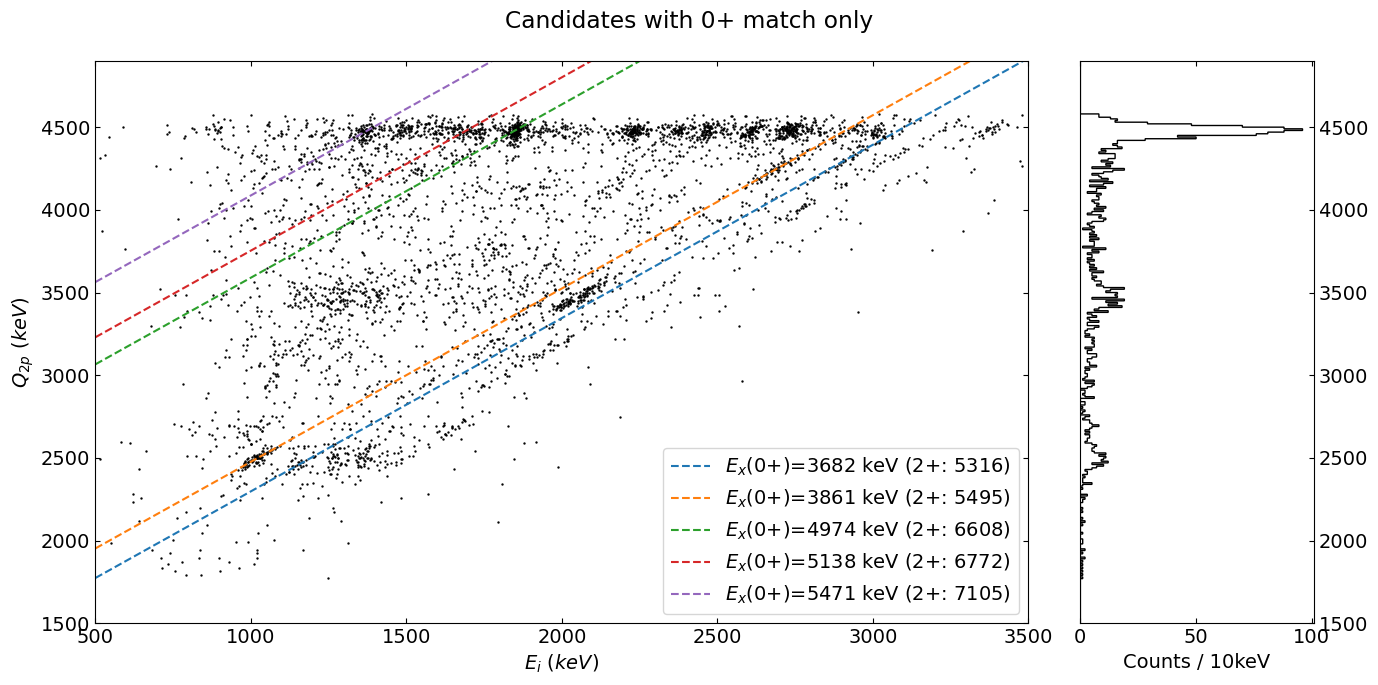

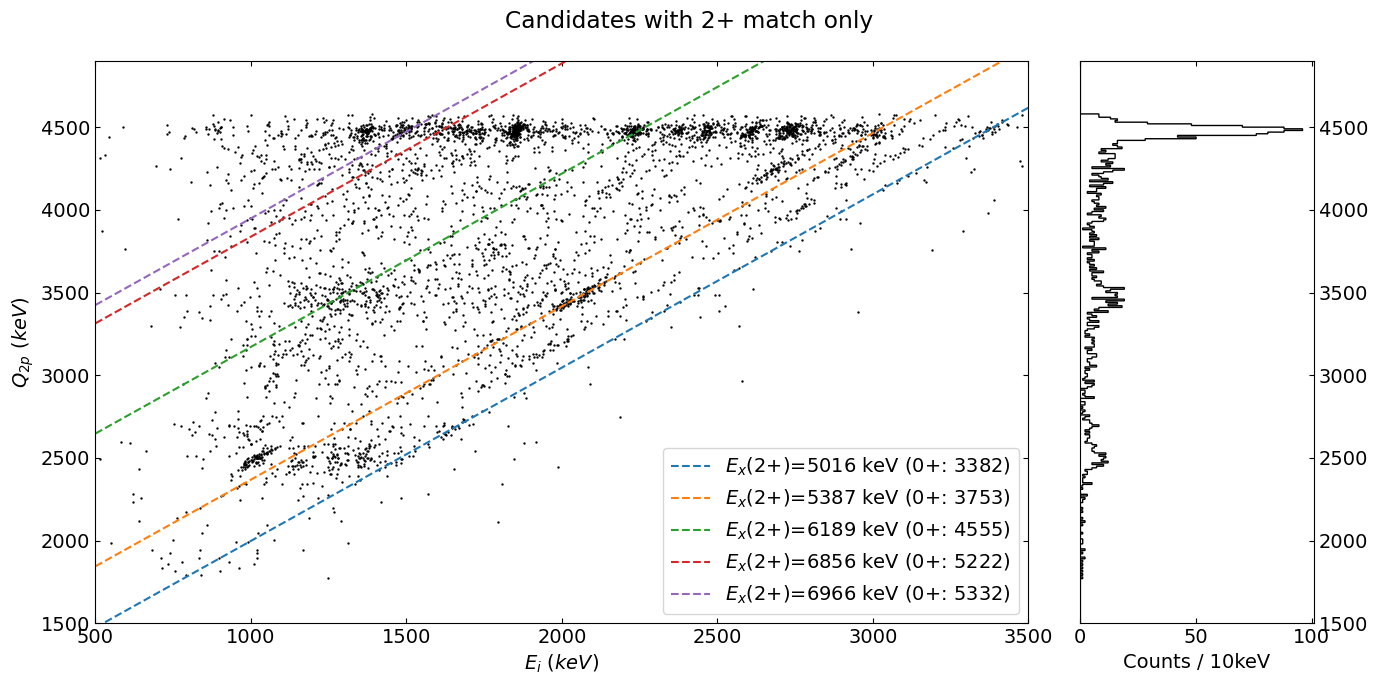

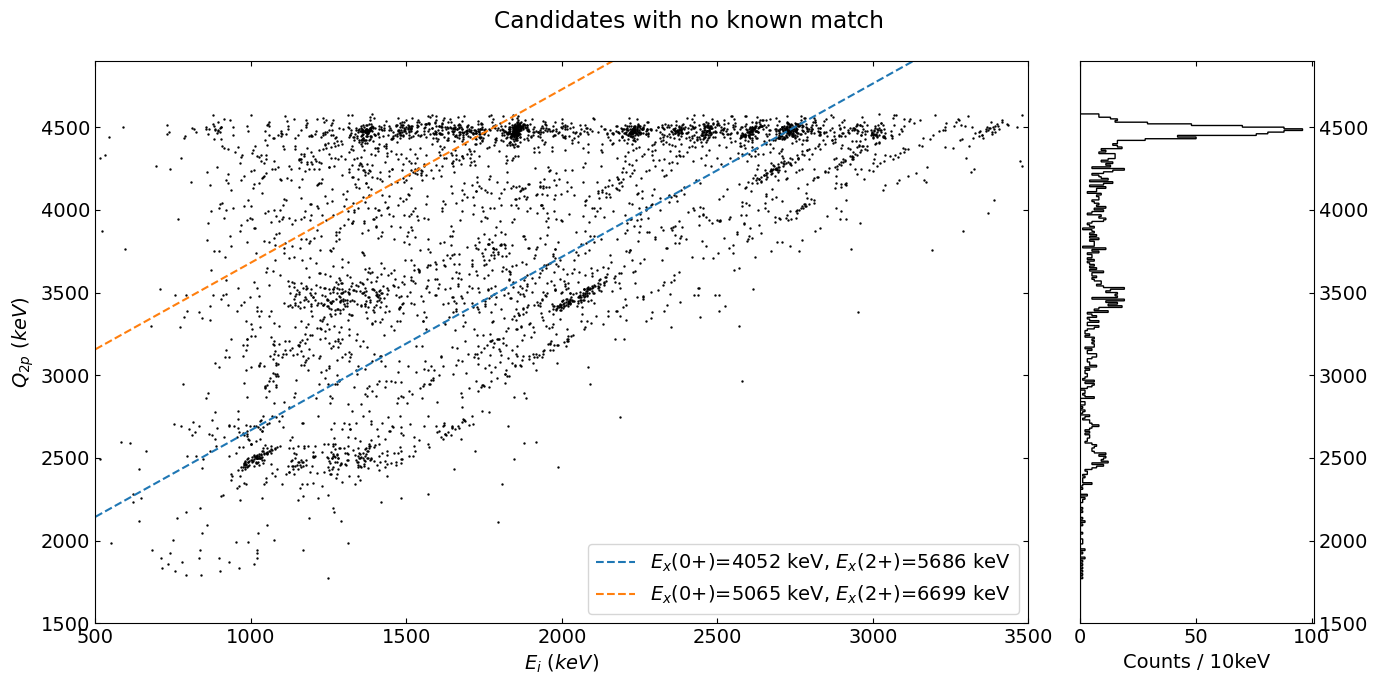

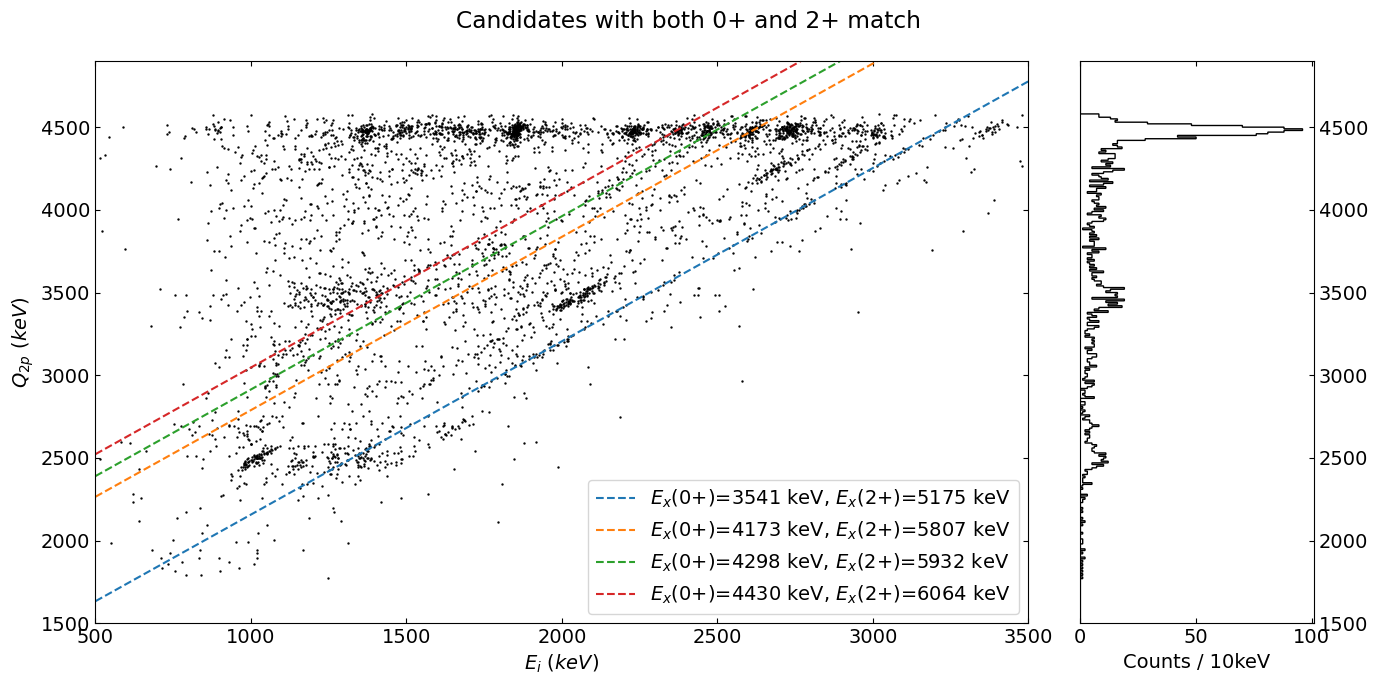

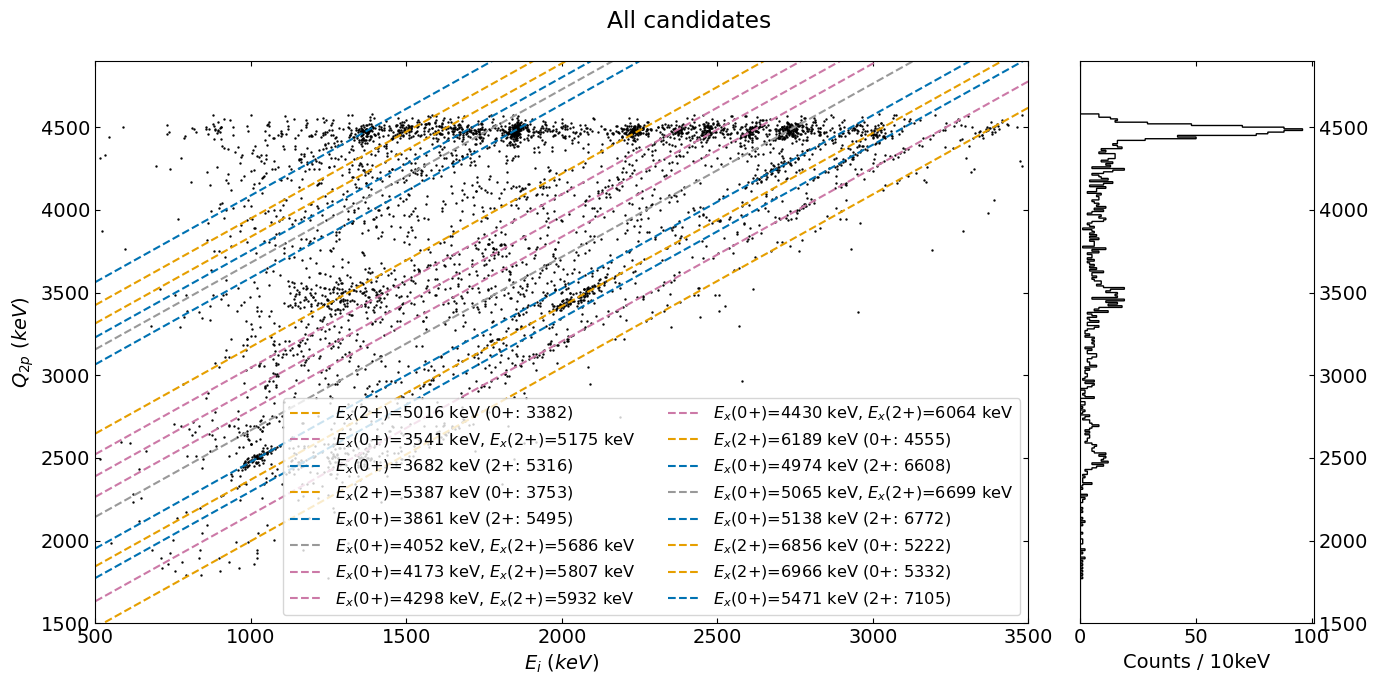

In [11]:


# --------------------------
# Candidate search parameters
# --------------------------
Nmin = 50        # minimum events close to line
dE   = 20        # tolerance in keV for matching points to line
step = 10         # step size for Q2 scan
delta_count = 5  # minimal count difference to flag local max
Q2_candidates = np.arange(0, 10000, step)
mask_ias = (Q2p < 4580) & (Q2p > 1750)
mask = (Q2p < 4580) & (Q2p > 1750)

# --------------------------
# Arrays for plotting/fitting
# --------------------------
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
q2 = np.array(Q2p[mask])
E_fit = np.linspace(0, 7000, 500)

E_below_0, E_below_2, E_below_nom, E_below_both = [],[],[],[]

# --------------------------
# Count points near each Q2 candidate
# --------------------------
counts_vs_Q2 = []
for Q2_guess in Q2_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE
    mask_line = mask_line1 | mask_line2
    count = np.sum(mask_line)
    #if count >= Nmin:
    counts_vs_Q2.append((Q2_guess, count))
#print(counts_vs_Q2)
# --------------------------
# Detect local significant maxima
# --------------------------
# --------------------------
# Detect local significant maxima with cascading neighbor check
# --------------------------
final_candidates = []
if counts_vs_Q2:
    counts = counts_vs_Q2  # already sorted by Q2
    n = len(counts)

    for i in range(n):
        count_curr = counts[i][1]
        if count_curr>=Nmin:
        # Try neighbor windows from 2 to 5
            for window in range(2, 6):
                # Previous 'window' counts
                prev_counts = [counts[i - w][1] if i - w >= 0 else -np.inf for w in range(1, window+1)]

                # Next 'window' counts
                next_counts = [counts[i + w][1] if i + w < n else -np.inf for w in range(1, window+1)]

                
                # Check if all neighbors are <= current
                if all(c <= count_curr+2 for c in prev_counts) and all(c <= count_curr+2 for c in next_counts):
                    final_candidates.append(counts[i])
                    break  # Stop checking larger windows once one is satisfied

#print("Final candidates (Q2, count):", final_candidates)
grouped_candidates = []
if final_candidates:
    final_candidates.sort(key=lambda x: x[0])  # sort by Q2
    group = [final_candidates[0]]
    for q, c in final_candidates[1:]:
        if abs(q - group[-1][0]) <= 30:  # within 30 keV
            group.append((q, c))
        else:
            # take the mean Q2 of the group
            mean_q2 = np.mean([g[0] for g in group])
            total_count = np.max([g[1] for g in group])  # optionally take max count
            grouped_candidates.append((mean_q2, total_count))
            group = [(q, c)]
    # last group
    mean_q2 = np.mean([g[0] for g in group])
    total_count = np.max([g[1] for g in group])
    grouped_candidates.append((mean_q2, total_count))
# --------------------------
# Function to create a base figure with tight layout
# --------------------------
def create_base_figure(title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,
                                   gridspec_kw={'width_ratios':[4,1]})
    # Scatter plots
    ax1.scatter(E1[mask_ias], Q2p[mask_ias], color='k', s=0.5)
    ax1.scatter(E2[mask_ias], Q2p[mask_ias], color='k', s=0.5)
    #ax1.hlines(4350, 0,7000, ls='--', lw=0.9, alpha=0.8, label="Cut region")
    ax1.set_xlabel(r"$E_i \ (keV)$")
    ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
    ax1.set_xticks(np.arange(0,7000,500), minor=True)
    ax1.set_xlim(500,3500)
    ax1.set_yticks(np.arange(500,8000,500), minor=True)
    ax1.set_ylim(1500,4900)

    # Horizontal histogram
    ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10), 
             histtype='step', orientation='horizontal', color='k')
    ax2.set_xlabel("Counts / 10keV")
    ax2.yaxis.set_ticks_position('right')

    fig.suptitle(title)
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    return fig, ax1, ax2

# --------------------------
# Create four figures
# --------------------------
fig0, ax0_1, ax0_2 = create_base_figure("Candidates with 0+ match only")
fig2, ax2_1, ax2_2 = create_base_figure("Candidates with 2+ match only")
fignm, axnm_1, axnm_2 = create_base_figure("Candidates with no known match")
figboth, axboth_1, axboth_2 = create_base_figure("Candidates with both 0+ and 2+ match")

# --------------------------
# Loop through candidates
# --------------------------
for Q2_guess, count in grouped_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < 30
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < 30
    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, E_vals, Q2p_vals, p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]

        Ex_0plus = Q2_fit + S2p - S1p
        Ex_2plus = Ex_0plus + 1634

        def check_match(Ex_val):
            known_match = None
            diffs_erik = np.abs(Erik_Es - Ex_val)
            if np.any(diffs_erik <= 30):
                known_match = Erik_Es[np.argmin(diffs_erik)]
            else:
                diffs_exc = np.abs(E_excited - Ex_val)
                if np.any(diffs_exc <= 30):
                    known_match = E_excited[np.argmin(diffs_exc)]
            return known_match

        match_0plus = check_match(Ex_0plus)
        match_2plus = check_match(Ex_2plus)
        # --------------------------
        # Decide which figure(s) this candidate goes into
        # --------------------------
        if match_0plus is not None and match_2plus is None:
            # 0+ only
            E_below_0.append(Q2_fit)
            ax0_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                       label=fr"$E_x$(0+)={Ex_0plus:.0f} keV (2+: {Ex_2plus:.0f})")
        elif match_2plus is not None and match_0plus is None:
            # 2+ only
            E_below_2.append(Q2_fit)
            ax2_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                       label=fr"$E_x$(2+)={Ex_2plus:.0f} keV (0+: {Ex_0plus:.0f})")
        elif match_0plus is None and match_2plus is None:
            # no match
            E_below_nom.append(Q2_fit)
            axnm_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                        label=fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV")
        else:
            # both 0+ and 2+
            E_below_both.append(Q2_fit)
            axboth_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                          label=fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV")

# --------------------------
# Add legends
# --------------------------
for ax in [ax0_1, ax2_1, axnm_1, axboth_1]:
    ax.legend(loc='lower right', ncol=1)

# --------------------------
# Colorblind-safe colors
# --------------------------
color_map = {
    "0+": "#0072B2",        # blue
    "2+": "#E69F00",        # orange
    "0+&2+": "#CC79A7",     # purple
    "no_match": "#999999"   # gray
}

# --------------------------
# Create base figure
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,
                               gridspec_kw={'width_ratios':[4,1]})

# Scatter plots
ax1.scatter(E1[mask_ias], Q2p[mask_ias], color='k', s=0.5)
ax1.scatter(E2[mask_ias], Q2p[mask_ias], color='k', s=0.5)
#ax1.hlines(4350, 0,7000, ls='--', lw=0.9, alpha=0.8, label="Cut region")
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000,500), minor=True)
ax1.set_xlim(500,3500)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(1500,4900)

# Horizontal histogram
ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10),
         histtype='step', orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

# --------------------------
# Loop through candidates
# --------------------------
for Q2_guess, count in grouped_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < 30
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < 30
    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, E_vals, Q2p_vals, p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]

        Ex_0plus = Q2_fit + S2p - S1p
        Ex_2plus = Ex_0plus + 1634

        def check_match(Ex_val):
            known_match = None
            diffs_erik = np.abs(Erik_Es - Ex_val)
            if np.any(diffs_erik <= 30):
                known_match = Erik_Es[np.argmin(diffs_erik)]
            else:
                diffs_exc = np.abs(E_excited - Ex_val)
                if np.any(diffs_exc <= 30):
                    known_match = E_excited[np.argmin(diffs_exc)]
            return known_match

        match_0plus = check_match(Ex_0plus)
        match_2plus = check_match(Ex_2plus)

        # --------------------------
        # Decide color and label
        # --------------------------
        if match_0plus is not None and match_2plus is None:
            color = color_map["0+"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV (2+: {Ex_2plus:.0f})"
        elif match_2plus is not None and match_0plus is None:
            color = color_map["2+"]
            label = fr"$E_x$(2+)={Ex_2plus:.0f} keV (0+: {Ex_0plus:.0f})"
        elif match_0plus is None and match_2plus is None:
            color = color_map["no_match"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV"
        else:
            color = color_map["0+&2+"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV"

        ax1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', color=color, label=label)

# --------------------------
# Legend and layout
# --------------------------
ax1.legend(loc='lower right', ncol=2, fontsize='small')
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle("All candidates")

plt.tight_layout()


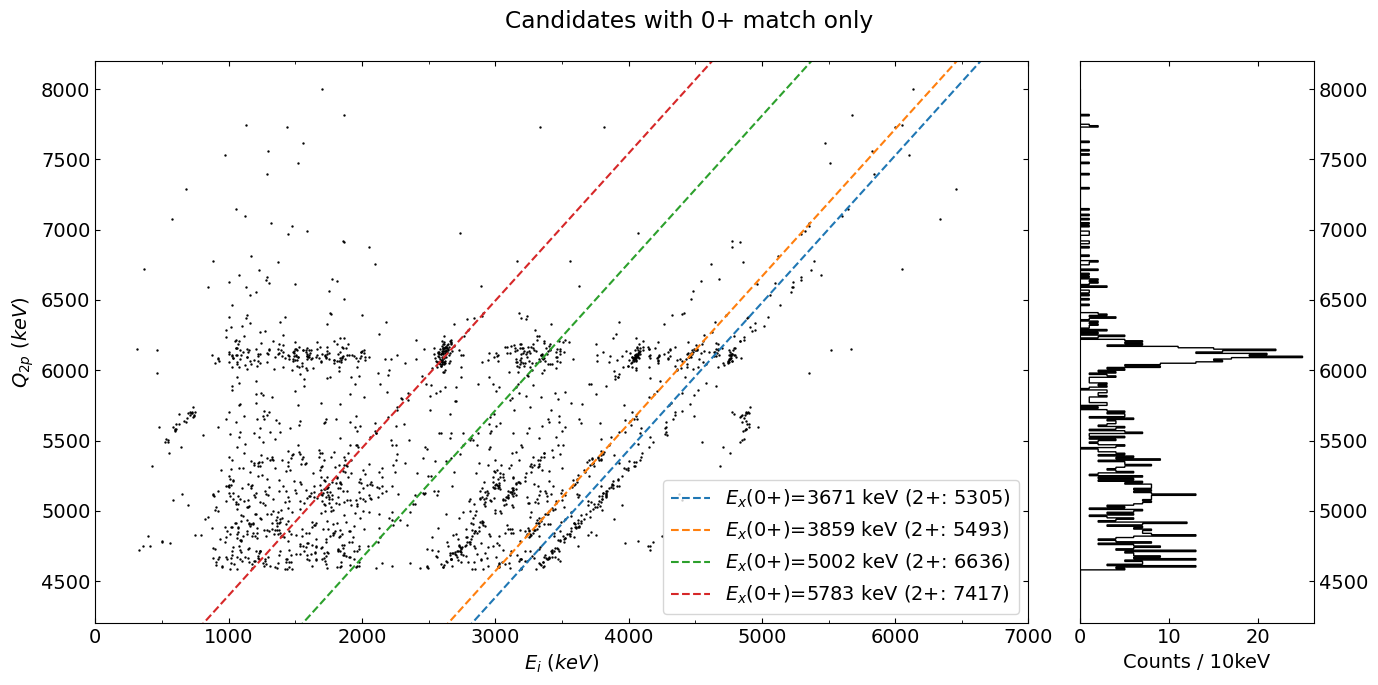

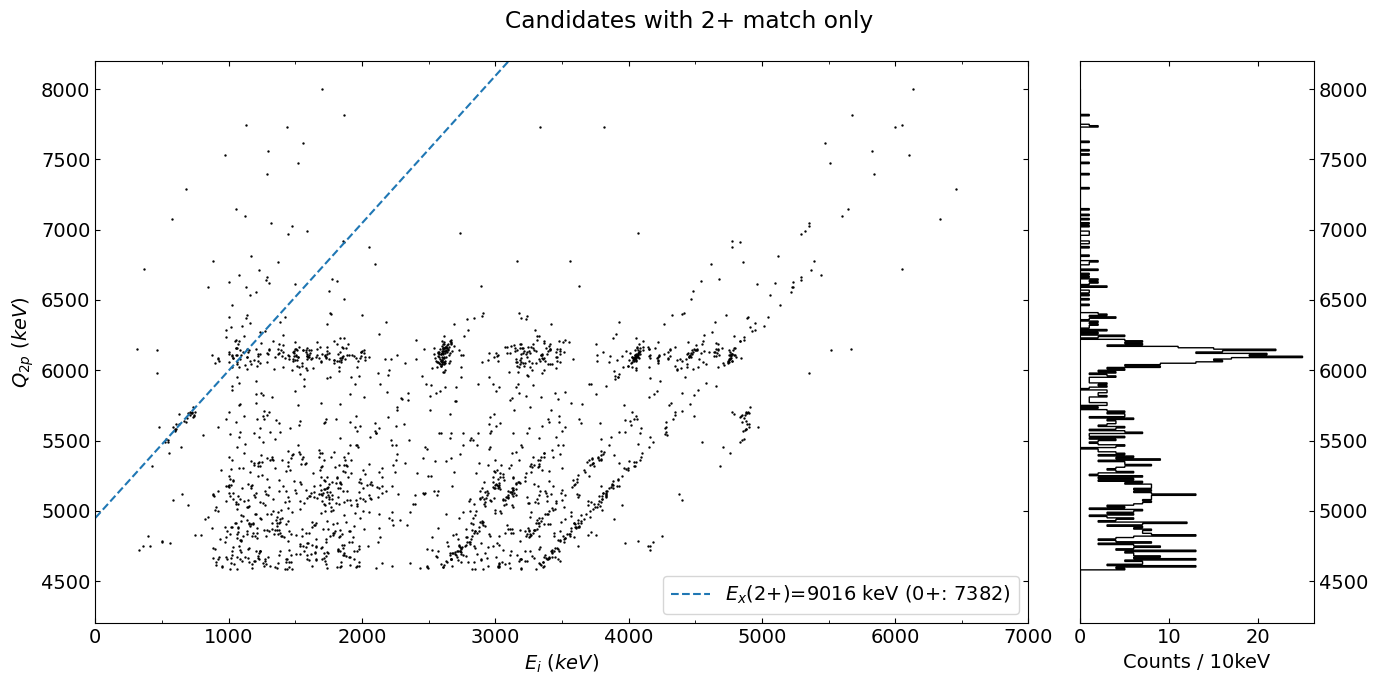

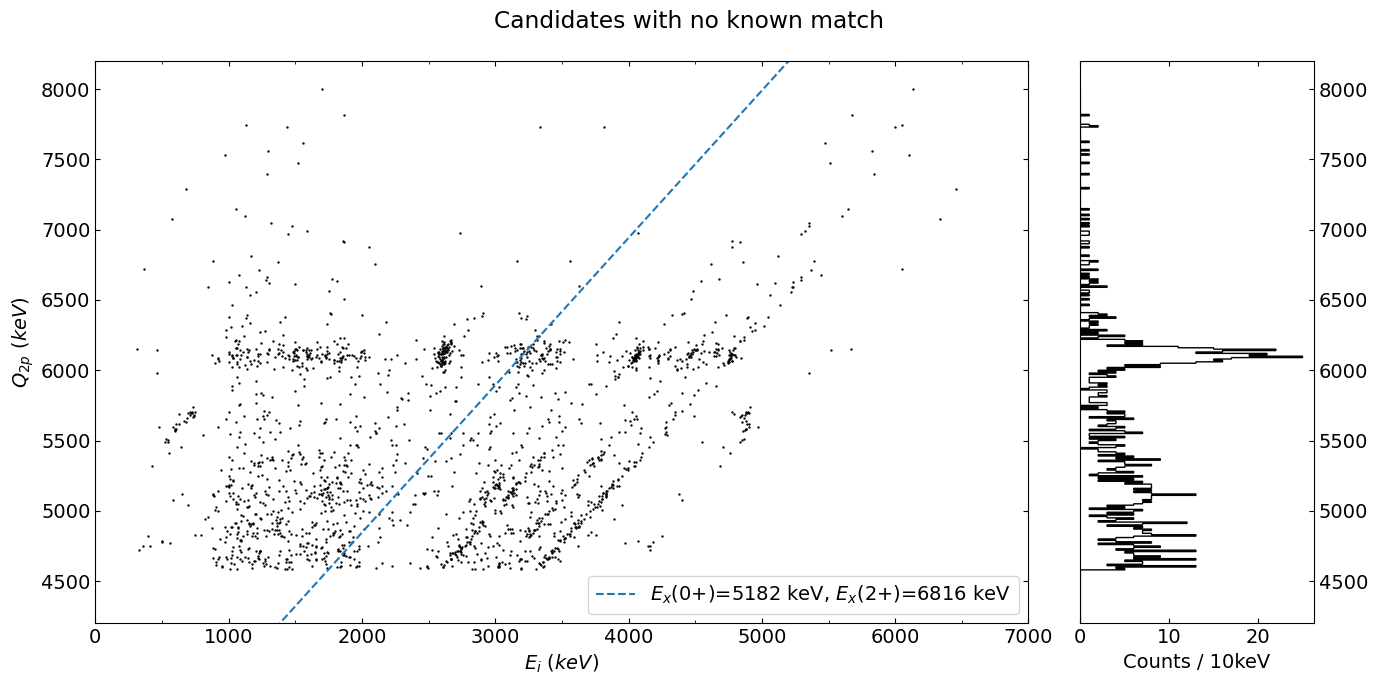

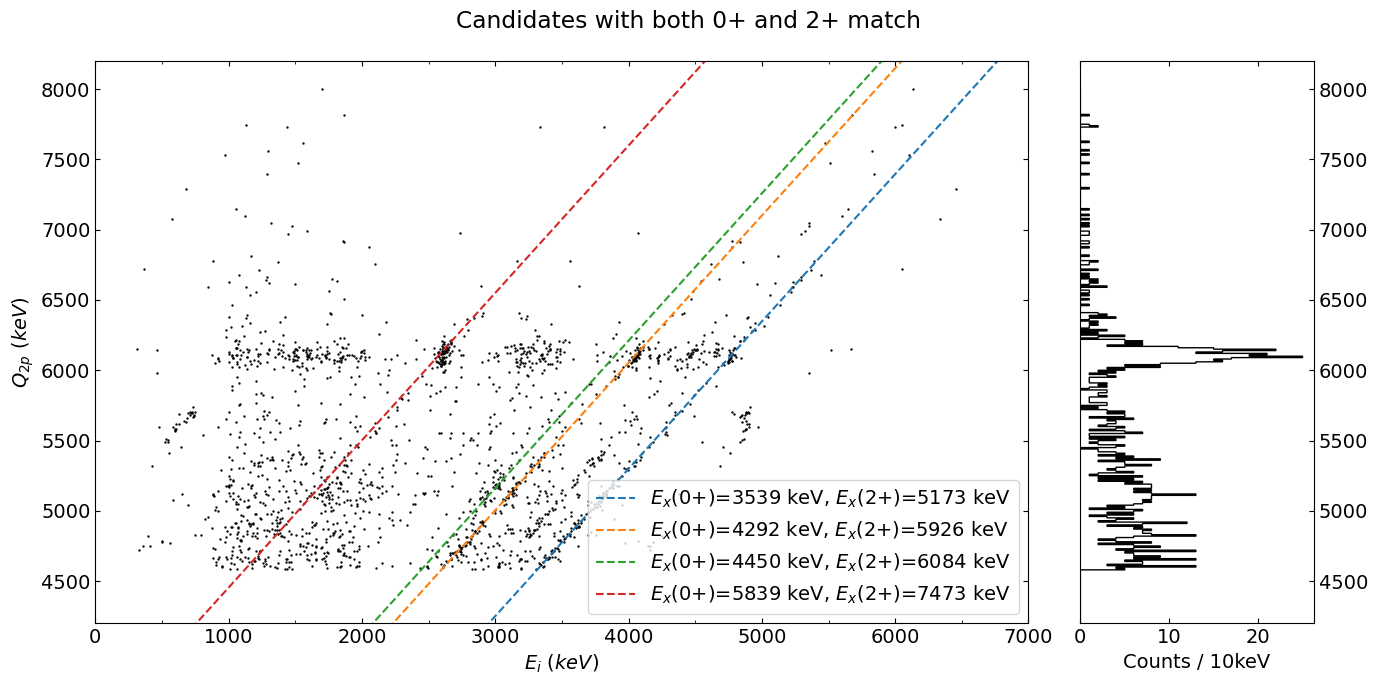

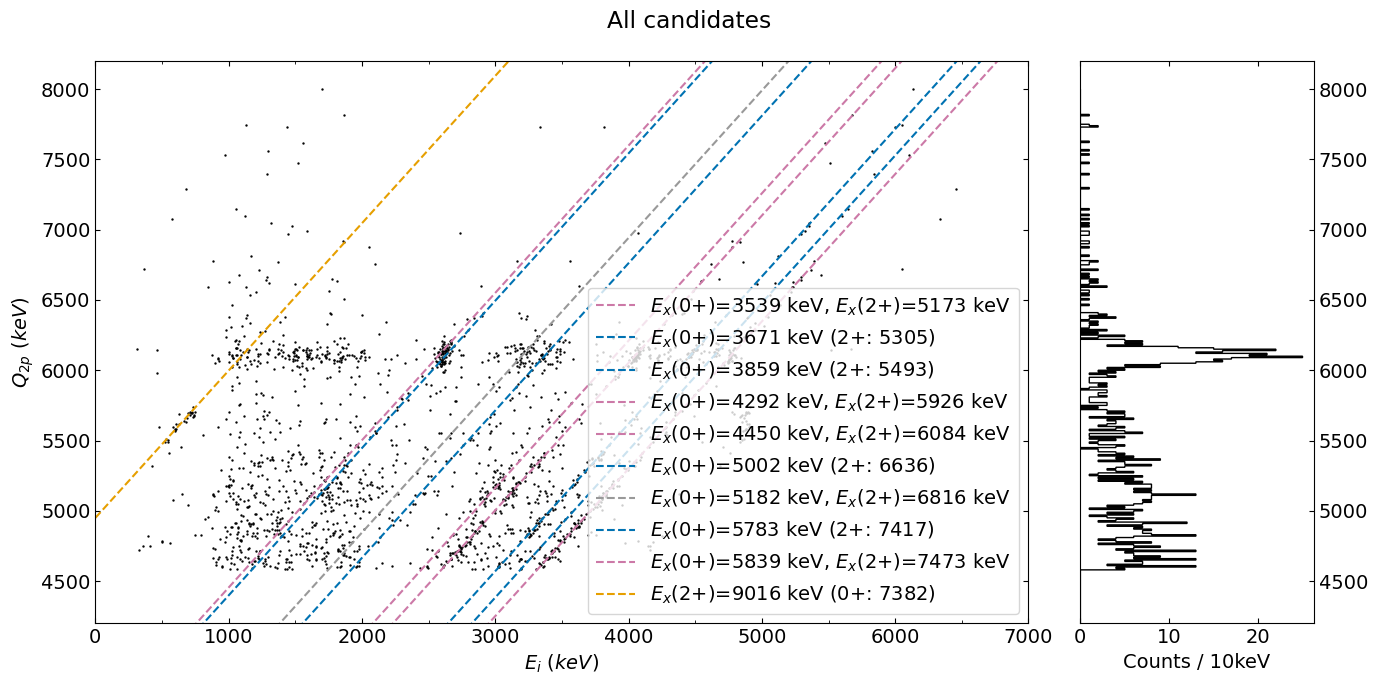

In [12]:


# --------------------------
# Candidate search parameters
# --------------------------
Nmin = 25        # minimum events close to line
dE   = 20        # tolerance in keV for matching points to line
step = 10         # step size for Q2 scan
delta_count = 5  # minimal count difference to flag local max
Q2_candidates = np.arange(0, 10000, step)
mask_ias = (Q2p >4580)# & (Q2p > 1750)
mask = (Q2p > 4580)# & (Q2p > 1750)

# --------------------------
# Arrays for plotting/fitting
# --------------------------
e1 = np.array(E1[mask])
e2 = np.array(E2[mask])
q2 = np.array(Q2p[mask])
E_fit = np.linspace(0, 7000, 500)
E_above_0, E_above_2, E_above_nom, E_above_both = [],[],[],[]

# --------------------------
# Count points near each Q2 candidate
# --------------------------
counts_vs_Q2 = []
for Q2_guess in Q2_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < dE
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < dE
    mask_line = mask_line1 | mask_line2
    count = np.sum(mask_line)
    #if count >= Nmin:
    counts_vs_Q2.append((Q2_guess, count))
#print(counts_vs_Q2)
# --------------------------
# Detect local significant maxima
# --------------------------
# --------------------------
# Detect local significant maxima with cascading neighbor check
# --------------------------
final_candidates = []
if counts_vs_Q2:
    counts = counts_vs_Q2  # already sorted by Q2
    n = len(counts)

    for i in range(n):
        count_curr = counts[i][1]
        if count_curr>=Nmin:
        # Try neighbor windows from 2 to 5
            for window in range(2, 6):
                # Previous 'window' counts
                prev_counts = [counts[i - w][1] if i - w >= 0 else -np.inf for w in range(1, window+1)]

                # Next 'window' counts
                next_counts = [counts[i + w][1] if i + w < n else -np.inf for w in range(1, window+1)]

                
                # Check if all neighbors are <= current
                if all(c <= count_curr+2 for c in prev_counts) and all(c <= count_curr+2 for c in next_counts):
                    final_candidates.append(counts[i])
                    break  # Stop checking larger windows once one is satisfied

#print("Final candidates (Q2, count):", final_candidates)
grouped_candidates = []
if final_candidates:
    final_candidates.sort(key=lambda x: x[0])  # sort by Q2
    group = [final_candidates[0]]
    for q, c in final_candidates[1:]:
        if abs(q - group[-1][0]) <= 30:  # within 30 keV
            group.append((q, c))
        else:
            # take the mean Q2 of the group
            mean_q2 = np.mean([g[0] for g in group])
            total_count = np.max([g[1] for g in group])  # optionally take max count
            grouped_candidates.append((mean_q2, total_count))
            group = [(q, c)]
    # last group
    mean_q2 = np.mean([g[0] for g in group])
    total_count = np.max([g[1] for g in group])
    grouped_candidates.append((mean_q2, total_count))
# --------------------------
# Function to create a base figure with tight layout
# --------------------------
def create_base_figure(title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,
                                   gridspec_kw={'width_ratios':[4,1]})
    # Scatter plots
    ax1.scatter(E1[mask_ias], Q2p[mask_ias], color='k', s=0.5)
    ax1.scatter(E2[mask_ias], Q2p[mask_ias], color='k', s=0.5)
    #ax1.hlines(4350, 0,7000, ls='--', lw=0.9, alpha=0.8, label="Cut region")
    ax1.set_xlabel(r"$E_i \ (keV)$")
    ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
    ax1.set_xticks(np.arange(0,7000, 500), minor=True)
    ax1.set_xlim(0,7000)
    ax1.set_yticks(np.arange(500,8000,500), minor=True)
    ax1.set_ylim(4200,8200)

    # Horizontal histogram
    ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10), 
             histtype='step', orientation='horizontal', color='k')
    ax2.set_xlabel("Counts / 10keV")
    ax2.yaxis.set_ticks_position('right')

    fig.suptitle(title)
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    return fig, ax1, ax2

# --------------------------
# Create four figures
# --------------------------
fig0, ax0_1, ax0_2 = create_base_figure("Candidates with 0+ match only")
fig2, ax2_1, ax2_2 = create_base_figure("Candidates with 2+ match only")
fignm, axnm_1, axnm_2 = create_base_figure("Candidates with no known match")
figboth, axboth_1, axboth_2 = create_base_figure("Candidates with both 0+ and 2+ match")

# --------------------------
# Loop through candidates
# --------------------------
for Q2_guess, count in grouped_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < 30
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < 30
    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, E_vals, Q2p_vals, p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]

        Ex_0plus = Q2_fit + S2p - S1p
        Ex_2plus = Ex_0plus + 1634

        def check_match(Ex_val):
            known_match = None
            diffs_erik = np.abs(Erik_Es - Ex_val)
            if np.any(diffs_erik <= 30):
                known_match = Erik_Es[np.argmin(diffs_erik)]
            else:
                diffs_exc = np.abs(E_excited - Ex_val)
                if np.any(diffs_exc <= 30):
                    known_match = E_excited[np.argmin(diffs_exc)]
            return known_match

        match_0plus = check_match(Ex_0plus)
        match_2plus = check_match(Ex_2plus)

        # --------------------------
        # Decide which figure(s) this candidate goes into
        # --------------------------
        if match_0plus is not None and match_2plus is None:
            # 0+ only
            E_above_0.append(Q2_fit)
            ax0_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                       label=fr"$E_x$(0+)={Ex_0plus:.0f} keV (2+: {Ex_2plus:.0f})")
        elif match_2plus is not None and match_0plus is None:
            # 2+ only
            E_above_2.append(Q2_fit)
            ax2_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                       label=fr"$E_x$(2+)={Ex_2plus:.0f} keV (0+: {Ex_0plus:.0f})")
        elif match_0plus is None and match_2plus is None:
            # no match
            E_above_nom.append(Q2_fit)
            axnm_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                        label=fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV")
        else:
            # both 0+ and 2+
            E_above_both.append(Q2_fit)
            axboth_1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', 
                          label=fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV")

# --------------------------
# Add legends
# --------------------------
for ax in [ax0_1, ax2_1, axnm_1, axboth_1]:
    ax.legend(loc='lower right', ncol=1)

# --------------------------
# Colorblind-safe colors
# --------------------------
color_map = {
    "0+": "#0072B2",        # blue
    "2+": "#E69F00",        # orange
    "0+&2+": "#CC79A7",     # purple
    "no_match": "#999999"   # gray
}

# --------------------------
# Create base figure
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharey=True,
                               gridspec_kw={'width_ratios':[4,1]})

# Scatter plots
ax1.scatter(E1[mask_ias], Q2p[mask_ias], color='k', s=0.5)
ax1.scatter(E2[mask_ias], Q2p[mask_ias], color='k', s=0.5)
#ax1.hlines(4350, 0,7000, ls='--', lw=0.9, alpha=0.8, label="Cut region")
ax1.set_xlabel(r"$E_i \ (keV)$")
ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
ax1.set_xticks(np.arange(0,7000, 500), minor=True)
ax1.set_xlim(0,7000)
ax1.set_yticks(np.arange(500,8000,500), minor=True)
ax1.set_ylim(4200,8200)

# Horizontal histogram
ax2.hist(Q2p[mask_ias], bins=np.arange(500,8000+10,10),
         histtype='step', orientation='horizontal', color='k')
ax2.set_xlabel("Counts / 10keV")
ax2.yaxis.set_ticks_position('right')

# --------------------------
# Loop through candidates
# --------------------------
for Q2_guess, count in grouped_candidates:
    mask_line1 = np.abs(q2 - q2p(e1, Q2_guess)) < 30
    mask_line2 = np.abs(q2 - q2p(e2, Q2_guess)) < 30
    Q2p_vals = np.concatenate((q2[mask_line1], q2[mask_line2]))
    E_vals   = np.concatenate((e1[mask_line1], e2[mask_line2]))

    if len(Q2p_vals) >= Nmin:
        popt, pcov = curve_fit(q2p, E_vals, Q2p_vals, p0=[Q2_guess])
        Q2_fit = popt[0]
        Q2_err = np.sqrt(np.diag(pcov))[0]

        Ex_0plus = Q2_fit + S2p - S1p
        Ex_2plus = Ex_0plus + 1634

        def check_match(Ex_val):
            known_match = None
            diffs_erik = np.abs(Erik_Es - Ex_val)
            if np.any(diffs_erik <= 30):
                known_match = Erik_Es[np.argmin(diffs_erik)]
            else:
                diffs_exc = np.abs(E_excited - Ex_val)
                if np.any(diffs_exc <= 30):
                    known_match = E_excited[np.argmin(diffs_exc)]
            return known_match

        match_0plus = check_match(Ex_0plus)
        match_2plus = check_match(Ex_2plus)

        # --------------------------
        # Decide color and label
        # --------------------------
        if match_0plus is not None and match_2plus is None:
            color = color_map["0+"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV (2+: {Ex_2plus:.0f})"
        elif match_2plus is not None and match_0plus is None:
            color = color_map["2+"]
            label = fr"$E_x$(2+)={Ex_2plus:.0f} keV (0+: {Ex_0plus:.0f})"
        elif match_0plus is None and match_2plus is None:
            color = color_map["no_match"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV"
        else:
            color = color_map["0+&2+"]
            label = fr"$E_x$(0+)={Ex_0plus:.0f} keV, $E_x$(2+)={Ex_2plus:.0f} keV"

        ax1.plot(E_fit, q2p(E_fit, Q2_fit), ls='--', color=color, label=label)

# --------------------------
# Legend and layout
# --------------------------
ax1.legend(loc='lower right', ncol=1)
fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
fig.suptitle("All candidates")

plt.tight_layout()


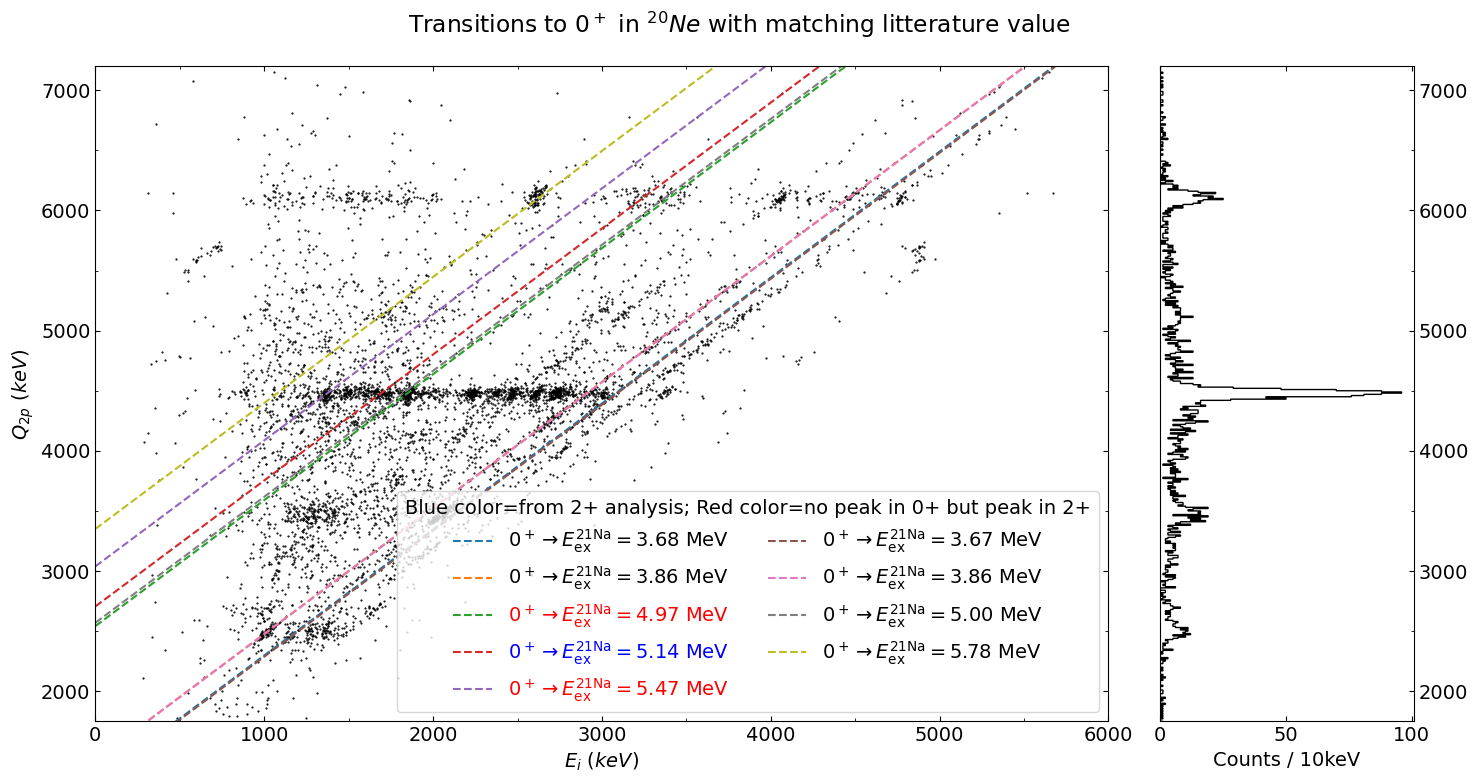

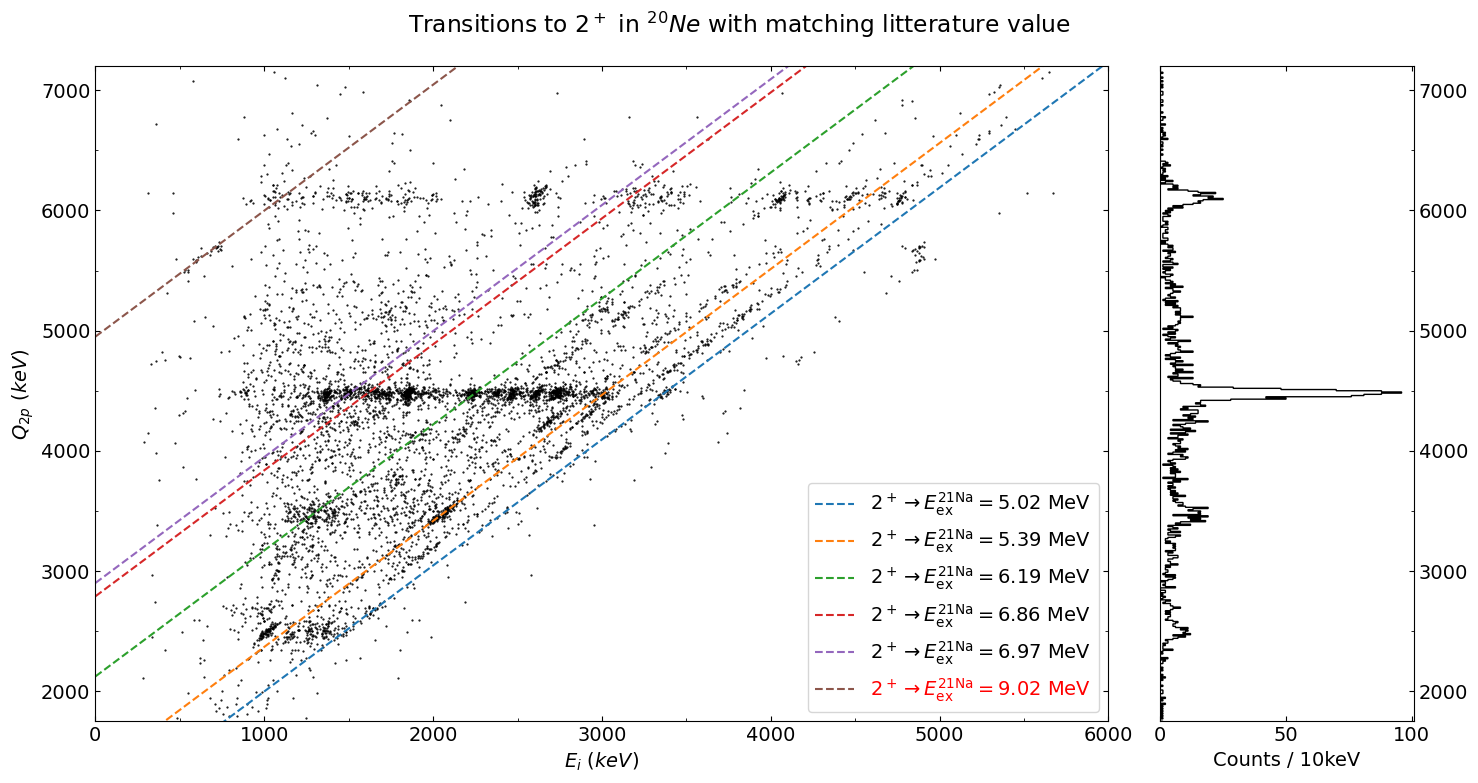

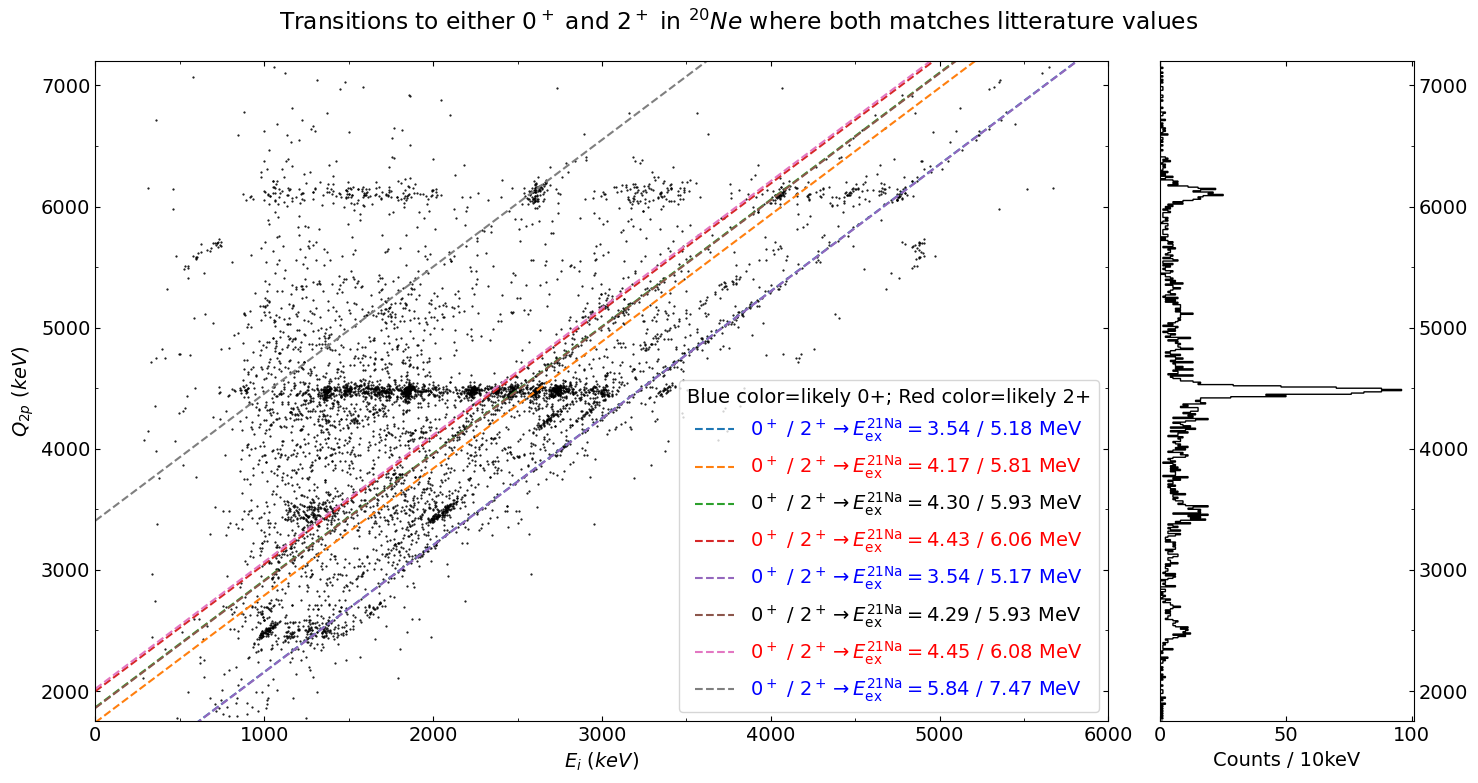

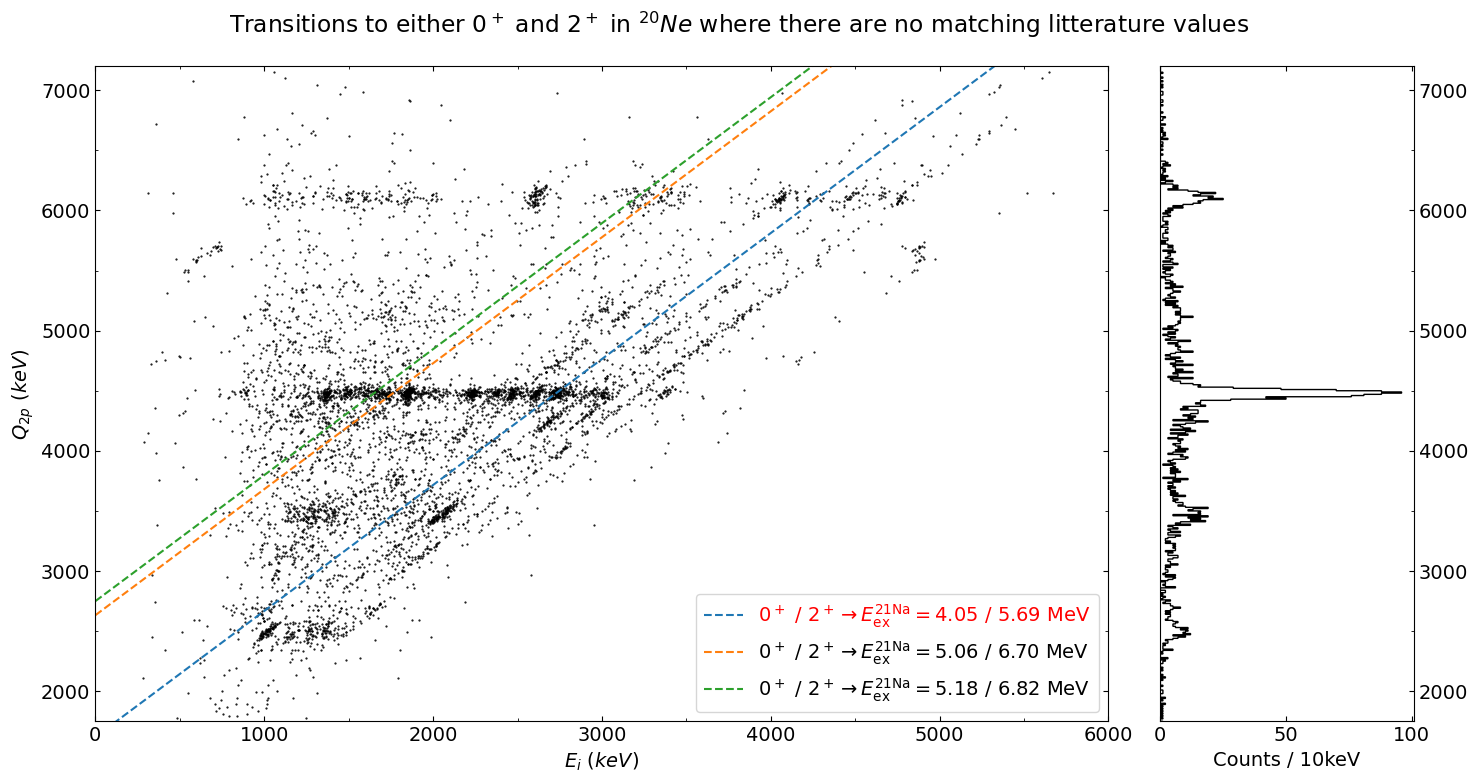

In [13]:
additional_0plus = []
additional_2plus = []
unfiltE = []

for data_group, title_text in zip(
    [ (E_below_0, E_above_0, "Blue color=from 2+ analysis; Red color=no peak in 0+ but peak in 2+"), 
      (E_below_2, E_above_2, None),
      (E_below_both, E_above_both, "Blue color=likely 0+; Red color=likely 2+"),
      (E_below_nom, E_above_nom, None) ],
    [ r"Transitions to $0^+$ in $^{20}Ne$ with matching litterature value",
      r"Transitions to $2^+$ in $^{20}Ne$ with matching litterature value",
      r"Transitions to either $0^+$ and $2^+$ in $^{20}Ne$ where both matches litterature values",
      r"Transitions to either $0^+$ and $2^+$ in $^{20}Ne$ where there are no matching litterature values" ]
):
    E_below, E_above, legend_title = data_group

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True, gridspec_kw={'width_ratios':[4,1]})
    ax1.scatter(E1,Q2p, color='k', s=0.3)
    ax1.scatter(E2,Q2p, color='k', s=0.3)
    ax1.set_xlabel(r"$E_i \ (keV)$")
    ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
    ax1.set_xticks(np.arange(0,7000, 500), minor=True)
    ax1.set_xlim(0,6000)
    ax1.set_yticks(np.arange(500,8000,500), minor=True)
    ax1.set_ylim(1750,7200)

    ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step', orientation='horizontal', color='k')
    ax2.set_xlabel("Counts / 10keV")
    ax2.yaxis.set_ticks_position('right')
    Es = np.linspace(0,7000,500)

    if title_text == r"Transitions to $0^+$ in $^{20}Ne$ with matching litterature value":
        for e in np.concatenate((E_below, E_above)):
            ax1.plot(Es, q2p(Es, e), ls='--', label = rf"$0^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p)/1e3:.2f}\ \mathrm{{MeV}}$")
        ax1.legend()
        leg = ax1.legend(title=legend_title, ncol=2)
        for text in leg.get_texts():
            if "4.97" in text.get_text() or "5.47" in text.get_text():
                text.set_color("red")
            if "5.14" in text.get_text():
                text.set_color("blue")

    elif title_text == r"Transitions to $2^+$ in $^{20}Ne$ with matching litterature value":
        for e in np.concatenate((E_below, E_above)):
            ax1.plot(Es, q2p(Es,e), ls='--', label = rf"$2^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p+1634)/1e3:.2f}\ \mathrm{{MeV}}$")
        ax1.legend()
        leg = ax1.legend()
        for text in leg.get_texts():
            if "9.02" in text.get_text():
                text.set_color("red")

    elif title_text == r"Transitions to either $0^+$ and $2^+$ in $^{20}Ne$ where both matches litterature values":
        for e in np.concatenate((E_below, E_above)):
            ax1.plot(Es, q2p(Es,e), ls='--', label = rf"$0^+ \ / \ 2^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p)/1e3:.2f}\ / \ {(e+S2p-S1p+1634)/1e3:.2f} \ \mathrm{{MeV}}$")
            unfiltE.append(e)
        ax1.legend()
        leg = ax1.legend(title=legend_title)
        for text in leg.get_texts():
            
            if "4.17" in text.get_text():
                text.set_color("red")
            if "3.54" in text.get_text() or "3.54" in text.get_text():
                text.set_color("blue")
            if "6.06" in text.get_text() or "6.08" in text.get_text():
                text.set_color("red")
            if "5.84" in text.get_text():
                text.set_color("blue")

    elif title_text == r"Transitions to either $0^+$ and $2^+$ in $^{20}Ne$ where there are no matching litterature values":
        for e in np.concatenate((E_below, E_above)):
            ax1.plot(Es, q2p(Es,e), ls='--', label = rf"$0^+ \ / \ 2^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p)/1e3:.2f}\ / \ {(e+S2p-S1p+1634)/1e3:.2f} \ \mathrm{{MeV}}$")
        ax1.legend()
        leg = ax1.legend()
        for text in leg.get_texts():
            if "5.69" in text.get_text():
                text.set_color("red")

    fig.suptitle(title_text)
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()


Below here are the final assignments of all the transitions from the above analysis. Two values from the 0+ match figures above are now plotted in the 2+ spectrum due to the 2p analysis carried out in the other script. Here it was found that the states 6.61 MeV, 7.11 MeV that have corresponding 0+ matches but no 2+ matches are indeed 2+ transitions due to them being heavily represented in the IAS -> 2+ transition. Therefore they are reassigned. Then we have a peak that is assigned as a 0+ but comes from the 2+ analysis sitting at an energy of 5.14 MeV, this indeed seems very strange. And it is most likely a wrong assignment, however I am not quite sure. There could be indication of its presence in the 0+ data however it needs crossreferencing with the 2p analysis done in the other script. Next there is the very last peak situated at 9.02 MeV that is due to the recoiling 18 Ne nuclei from the alpha decay of 22 Mg. This is therefore not a correct assignment. Now in the very last bit we have an excited level assigment at 4.05/5.69 MeV with no matches in either spectrum. However, the 2p analysis tells us that this is indeed a very strong IAS->2+ transition and most like it is a wide structure with satellite peaks. Therefore this peak is now assigned to the 2+ transitions. 

2505.0


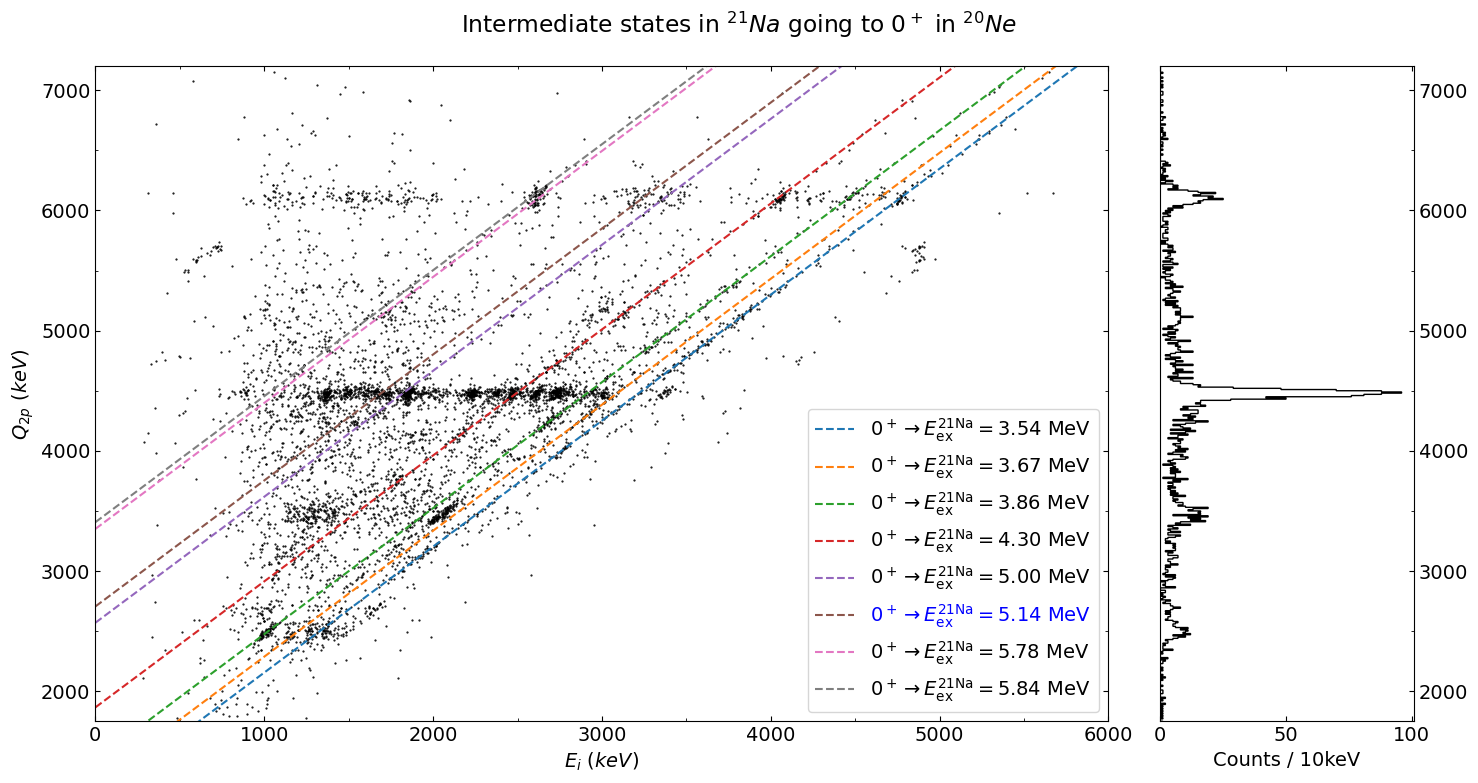

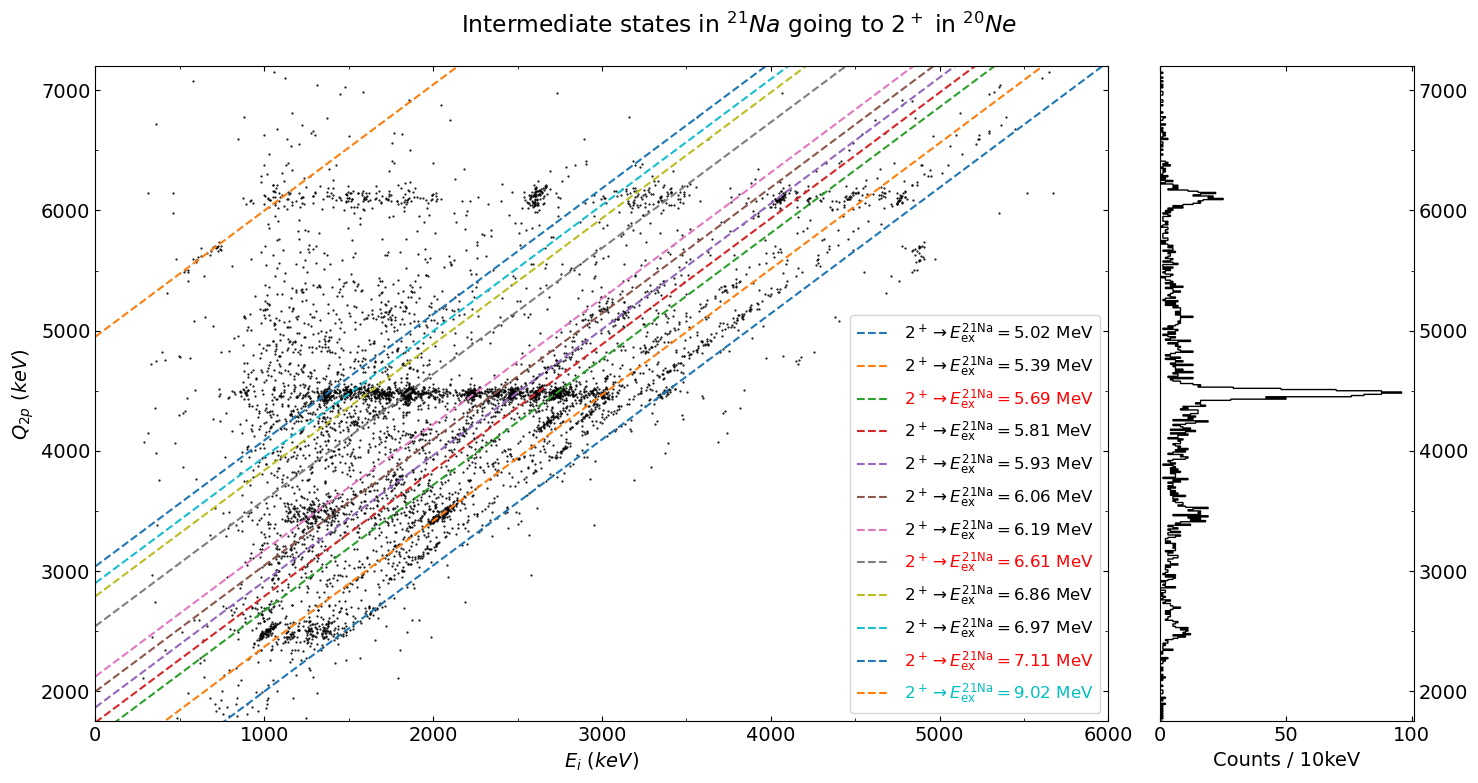

In [16]:
additional_0plus = np.unique(np.array([unfiltE[0],unfiltE[2], unfiltE[4], unfiltE[7]]))
additional_2plus = np.unique(np.array([unfiltE[1], unfiltE[2],unfiltE[3], unfiltE[6], E_below_nom[0],E_below_0[2], E_below_0[4]]))
#E_below_0[2] -> 4.97 -> 6.61
#E_below_0[3] -> 5.14 
#E_below_0[4] -> 5.47 -> 7.11
#E_above_2[-1] -> 9.02
#E_below_nom[0] -> 5.68
zeroplus = np.concatenate((E_below_0[:1], E_below_0[3:4], E_below_0[5:], E_above_0, additional_0plus))
twoplus = np.concatenate((E_below_2, E_above_2,additional_2plus))

uplim = 2590
lowlim = 2420
i = 0
###
##
# 5050
##
###
for elist, title_text in zip(
    [ zeroplus,twoplus],
    [ r"Intermediate states in $^{21}Na$ going to $0^+$ in $^{20}Ne$",
      r"Intermediate states in $^{21}Na$ going to $2^+$ in $^{20}Ne$"]
):
    #E_below, E_above, additional = data_group

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True, gridspec_kw={'width_ratios':[4,1]})
    ax1.scatter(E1,Q2p, color='k', s=0.3)
    ax1.scatter(E2,Q2p, color='k', s=0.3)
    ax1.set_xlabel(r"$E_i \ (keV)$")
    ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
    ax1.set_xticks(np.arange(0,7000, 500), minor=True)
    ax1.set_xlim(0,6000)
    ax1.set_yticks(np.arange(500,8000,500), minor=True)
    ax1.set_ylim(1750,7200)

    #ax1.hlines(lowlim, 0, 6000, color='c')
    #ax1.hlines(uplim, 0, 6000, color='c')
    #ax2.hlines(lowlim, 0, 90, color='c')
    #ax2.hlines(uplim, 0, 90, color='c')
    
    ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step', orientation='horizontal', color='k')
    ax2.set_xlabel("Counts / 10keV")
    ax2.yaxis.set_ticks_position('right')
    Es = np.linspace(0,7000,500)
    #energylist = np.concatenate([np.atleast_1d(E_below),np.atleast_1d(E_above),np.atleast_1d(additional)]).astype(float)
    energylist_sorted = np.sort(elist)

    cleaned = []
    threshold = 20

    for e in energylist_sorted:
        if len(cleaned) == 0 or abs(e - cleaned[-1]) > threshold:
            cleaned.append(e)

    cleaned = np.array(cleaned)
    
    if title_text == r"Intermediate states in $^{21}Na$ going to $0^+$ in $^{20}Ne$":
        for e in cleaned:
            ax1.plot(Es, q2p(Es, e), ls='--', label = rf"$0^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p)/1e3:.2f}\ \mathrm{{MeV}}$")
        
        leg = ax1.legend()
        for text in leg.get_texts():
            if "4.97" in text.get_text():
                text.set_color("red")
            if "5.14" in text.get_text() or "5.47" in text.get_text():
                text.set_color("blue")

    elif title_text == r"Intermediate states in $^{21}Na$ going to $2^+$ in $^{20}Ne$":
        for e in cleaned:
            ax1.plot(Es, q2p(Es,e), ls='--', label = rf"$2^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p+1634)/1e3:.2f}\ \mathrm{{MeV}}$")
        plt.rcParams.update({'font.size': 12})
        ax1.legend()
        
        leg = ax1.legend()
        for text in leg.get_texts():
            if "6.61" in text.get_text() or "7.11" in text.get_text() or "5.69" in text.get_text():
                text.set_color("r")
            if "9.02" in text.get_text():
                text.set_color("c")
        plt.rcParams.update({'font.size': 14})
    fig.suptitle(title_text)
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    i +=1
    plt.savefig(f"{i}trans.pdf")
#np.concatenate((E_below, E_above, additional))
#print(np.array(E_above_0)+S2p-S1p, np.array(E_above_2)+S2p-S1p+1634)
#E_below_0[2] -> fjern fra 0+ og sæt på 2+
#E_below_0[4] -> fjern fra 0+ og sæt på 2+
#E_above_2[-1] -> fjern fra 2+
#print(zeroplus)
#print(twoplus)
print((uplim+lowlim)/2)

[3539.02835307 3541.21776145 4297.741876   5838.50825268] [3681.82858656 3860.55108532 4973.7629306  5137.50054525 5471.14732449] [3671.40248653 3858.82855542 5001.87431777 5782.55081566]
2505.0


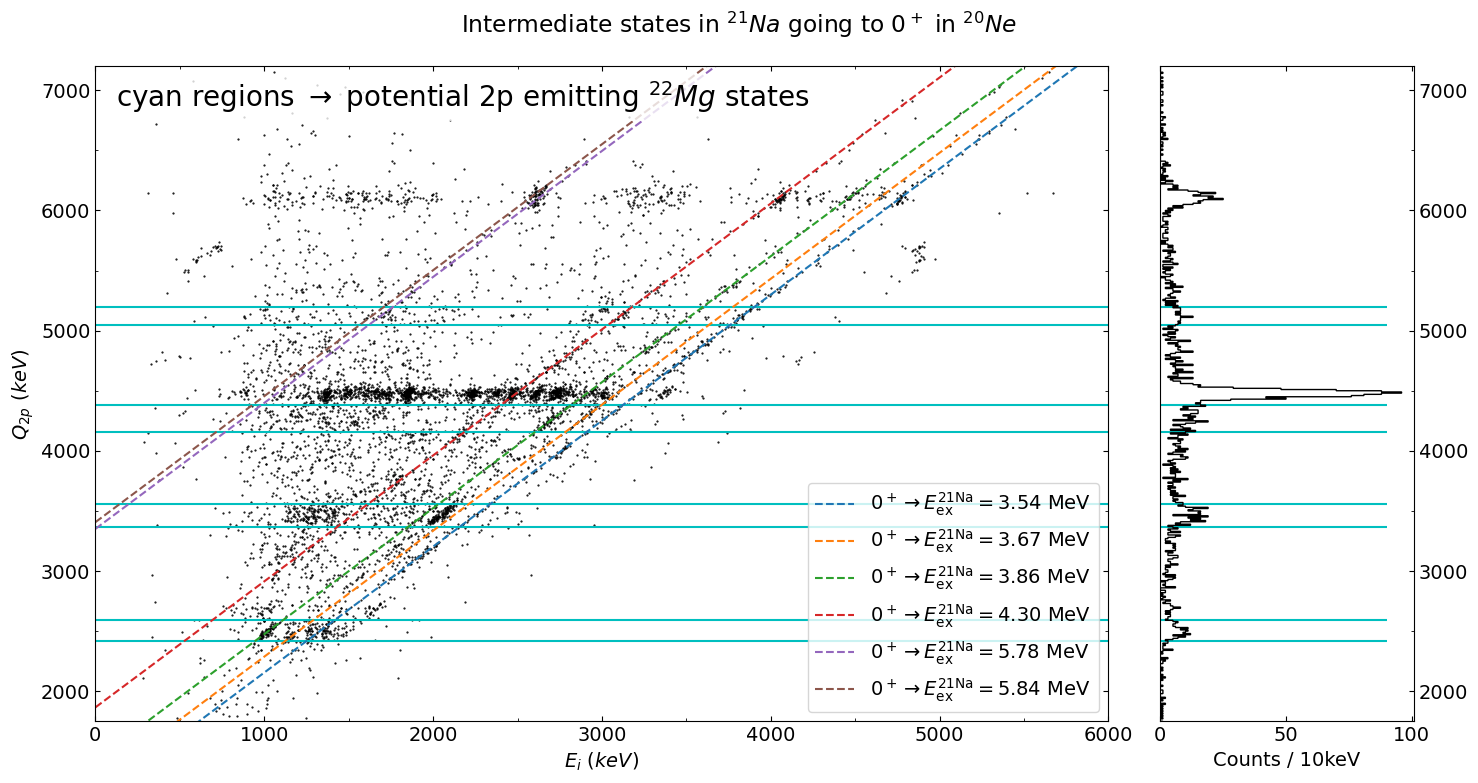

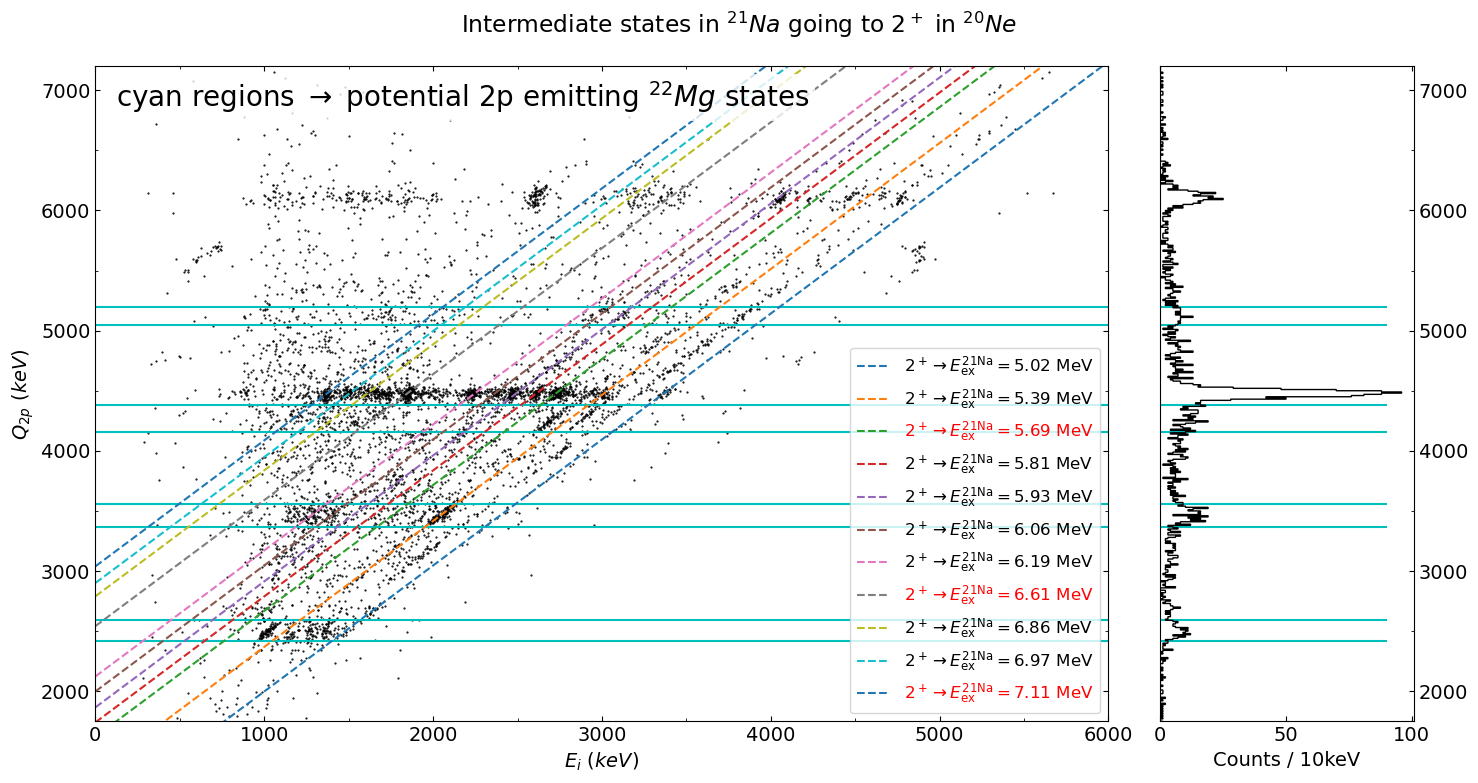

In [ ]:
additional_0plus = np.unique(np.array([unfiltE[0],unfiltE[2], unfiltE[4], unfiltE[7]]))
additional_2plus = np.unique(np.array([unfiltE[1], unfiltE[2],unfiltE[3], unfiltE[6], E_below_nom[0],E_below_0[2], E_below_0[4]]))
#E_below_0[2] -> 4.97 -> 6.61
#E_below_0[3] -> 5.14 
#E_below_0[4] -> 5.47 -> 7.11
#E_above_2[-1] -> 9.02
#E_below_nom[0] -> 5.68
zeroplus = np.concatenate((E_below_0[0:2], E_above_0[0:2], E_above_0[3:], additional_0plus))
twoplus = np.concatenate((E_below_2,additional_2plus))

uplim = 2590
lowlim = 2420
i = 0

limits = [(2420,2590), (3370,3560), (4160,4380), (5050,5200)]

###
##
# 5050
##
###
for elist, title_text in zip(
    [ zeroplus,twoplus],
    [ r"Intermediate states in $^{21}Na$ going to $0^+$ in $^{20}Ne$",
      r"Intermediate states in $^{21}Na$ going to $2^+$ in $^{20}Ne$"]
):
    #E_below, E_above, additional = data_group

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True, gridspec_kw={'width_ratios':[4,1]})
    ax1.text(0.02, 0.98, r"cyan regions $\rightarrow$ potential 2p emitting $^{22}Mg$ states", transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'), fontsize=20)
    ax1.scatter(E1,Q2p, color='k', s=0.3)
    ax1.scatter(E2,Q2p, color='k', s=0.3)
    ax1.set_xlabel(r"$E_i \ (keV)$")
    ax1.set_ylabel(r"$Q_{2p} \ (keV)$")
    ax1.set_xticks(np.arange(0,7000, 500), minor=True)
    ax1.set_xlim(0,6000)
    ax1.set_yticks(np.arange(500,8000,500), minor=True)
    ax1.set_ylim(1750,7200)
    for l in limits:
        ax1.hlines(l[0], 0, 6000, color='c')
        ax1.hlines(l[1], 0, 6000, color='c')
        ax2.hlines(l[1], 0, 90, color='c')
        ax2.hlines(l[0], 0, 90, color='c')
    
    ax2.hist(Q2p, bins=np.arange(500,8000+10,10), histtype='step', orientation='horizontal', color='k')
    ax2.set_xlabel("Counts / 10keV")
    ax2.yaxis.set_ticks_position('right')
    Es = np.linspace(0,7000,500)
    #energylist = np.concatenate([np.atleast_1d(E_below),np.atleast_1d(E_above),np.atleast_1d(additional)]).astype(float)
    energylist_sorted = np.sort(elist)

    cleaned = []
    threshold = 20

    for e in energylist_sorted:
        if len(cleaned) == 0 or abs(e - cleaned[-1]) > threshold:
            cleaned.append(e)

    cleaned = np.array(cleaned)
    
    if title_text == r"Intermediate states in $^{21}Na$ going to $0^+$ in $^{20}Ne$":
        for e in cleaned:
            ax1.plot(Es, q2p(Es, e), ls='--', label = rf"$0^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p)/1e3:.2f}\ \mathrm{{MeV}}$")
        
        leg = ax1.legend()
        for text in leg.get_texts():
            if "4.97" in text.get_text():
                text.set_color("red")
            if "5.14" in text.get_text() or "5.47" in text.get_text():
                text.set_color("blue")

    elif title_text == r"Intermediate states in $^{21}Na$ going to $2^+$ in $^{20}Ne$":
        for e in cleaned:
            ax1.plot(Es, q2p(Es,e), ls='--', label = rf"$2^+ \rightarrow E_{{\mathrm{{ex}}}}^{{21\mathrm{{Na}}}} = {(e+S2p-S1p+1634)/1e3:.2f}\ \mathrm{{MeV}}$")
        plt.rcParams.update({'font.size': 12})
        ax1.legend()
        
        leg = ax1.legend()
        for text in leg.get_texts():
            if "6.61" in text.get_text() or "7.11" in text.get_text() or "5.69" in text.get_text():
                text.set_color("r")
            if "9.02" in text.get_text():
                text.set_color("c")
        plt.rcParams.update({'font.size': 14})
    fig.suptitle(title_text)
    fig.subplots_adjust(wspace=0.1, left=0.08, right=0.95, top=0.9, bottom=0.1)
    plt.tight_layout()
    i +=1
    plt.savefig(f"{i}trans.pdf")
#print(E_below, E_above, additional_0plus)
print(np.array(additional_0plus)+S2p-S1p, np.array(E_below_0)+S2p-S1p, np.array(E_above_0)+S2p-S1p)
#E_below_0[2] -> fjern fra 0+ og sæt på 2+
#E_below_0[4] -> fjern fra 0+ og sæt på 2+
#E_above_2[-1] -> fjern fra 2+
#print(zeroplus)
#print(twoplus)
print((uplim+lowlim)/2)